# **Art sales price prediction project - A Machine Learning approch using advanced regression techniques.**

### **Joaquín Rodríguez Villegas**
Instagram: @joaquinrovi99

This small project aims to create a supervised machine learning regression algorithm in order to guide artist like me to better understand their artwork so that they can expect a realistic price when selling their paintings/drawings. 

For this project, I constructed a dataset based on the public information available in https://artradelatam.com/about-us which is a company that sells online artworks of different artists worldwide. For the analysis of this project there are some key takeaways to consider:

* **Data availability**: When constructing the dataset, it was considered the availability of the artists and the historical data within the platform. 
* **Data Quality**: The dataset transforms the unstruscture data from the platform into a table which contains the artist ID, Technique, Style, etc... So by the principle of GIGO (Garbage In - Garbage Out), the results of the model depend mainly on the quality of the data given in the webpage.
* **Sample size**: Sampling is a procedure used in inferential statistics in order to better understand a population parameter Θ, in this sense, the sample must be accurate enough in order to avoid bias and so the margin of error ξ is as small as possible. In this sense, the sample size n = 167 observations.

The PyCaret is an open source, low code machine learning library in Python that automates machine learning workflows. This library is going to be used in order to evaluate different regression models and understand the impact in the performance metrics.

## 0.1. Import/install the Python libraries & packages

In [1]:
!pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from itertools import product
import statsmodels.api as sm

In [3]:
from platform import python_version
print(python_version())

3.7.14


## 0.2. Import the remote dataset from Github

In [4]:
url_path = 'https://github.com/joaquinrovi/Art-Analytics/blob/main/paintings.xlsx?raw=true'
df = pd.read_excel(url_path)
df.head(5)

ID                    Artist       Style       Technique  \
0          MERAKI  María Fernanda Rodríguez    Abstract         Acrylic   
1  Alto Magdalena                     NEC1O   Landscape  Fine Art Print   
2           WAVES  John Mario Guisao Builes  Figurative         Acrylic   
3       Deep blue               Juan Montes    Abstract             Oil   
4  Color Drip Rat              Juan Salazar  Street Art         Acrylic   

       Theme  Format Orientation Frame  width (cm)  length (cm)  height (cm)  \
0   Abstract  Medium  Horizontal    No           3           70           35   
1   Abstract   Small      Square    No           3           18           18   
2  Landscape   Small    Vertical   Yes           2           24           30   
3   Abstract     Big  Horizontal    No           3          110           85   
4   Graffiti     Big      Square    No           5          100          100   

   weight (gr)      Type  Price (COP)  
0          500  Original       312804  
1          500  Original       714981  
2          500  Original       268118  
3         1000  Original      3664280  
4         3000  Original      4419480

## 0.3. Clean, Visualize the data and create the EDA (preprocess the dataset)

In [5]:
#Visualize the shape of the dataset
df.shape

(167, 14)

In [6]:
#Count the number of unique artists
len(df['Artist'].unique())

68

In [7]:
#Count the total number of missing data
df.isna().sum().sum()

0

In [8]:
#Basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           167 non-null    object
 1   Artist       167 non-null    object
 2   Style        167 non-null    object
 3   Technique    167 non-null    object
 4   Theme        167 non-null    object
 5   Format       167 non-null    object
 6   Orientation  167 non-null    object
 7   Frame        167 non-null    object
 8   width (cm)   167 non-null    int64 
 9   length (cm)  167 non-null    int64 
 10  height (cm)  167 non-null    int64 
 11  weight (gr)  167 non-null    int64 
 12  Type         167 non-null    object
 13  Price (COP)  167 non-null    int64 
dtypes: int64(5), object(9)
memory usage: 18.4+ KB


### 0.3.1. Explore the variables in the dataset

#### 0.3.1.1. Continuous variables

In [9]:
#Classify the main quantitative variables
dfQuant = pd.DataFrame(data = df, columns = ['width (cm)', 'length (cm)', 'height (cm)', 'weight (gr)', 'Price (COP)'])
dfQuant.head(3)

width (cm)  length (cm)  height (cm)  weight (gr)  Price (COP)
0           3           70           35          500       312804
1           3           18           18          500       714981
2           2           24           30          500       268118

In [10]:
#Apply the descriptive statistics for each quantitative variable
dfQuant.describe()

width (cm)  length (cm)  height (cm)   weight (gr)   Price (COP)
count  167.000000   167.000000   167.000000    167.000000  1.670000e+02
mean     2.808383    67.592814    69.772455   1688.622754  2.183936e+06
std      1.348512    40.557880    40.630079   1806.628330  3.542293e+06
min      0.000000    15.000000    15.000000    500.000000  7.599600e+04
25%      2.000000    35.000000    38.000000    500.000000  4.334570e+05
50%      3.000000    60.000000    61.000000   1000.000000  9.384130e+05
75%      4.000000   100.000000   100.000000   2500.000000  2.435406e+06
max      6.000000   200.000000   244.000000  15000.000000  2.234518e+07

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe09cc3a710>,
      dtype=object)

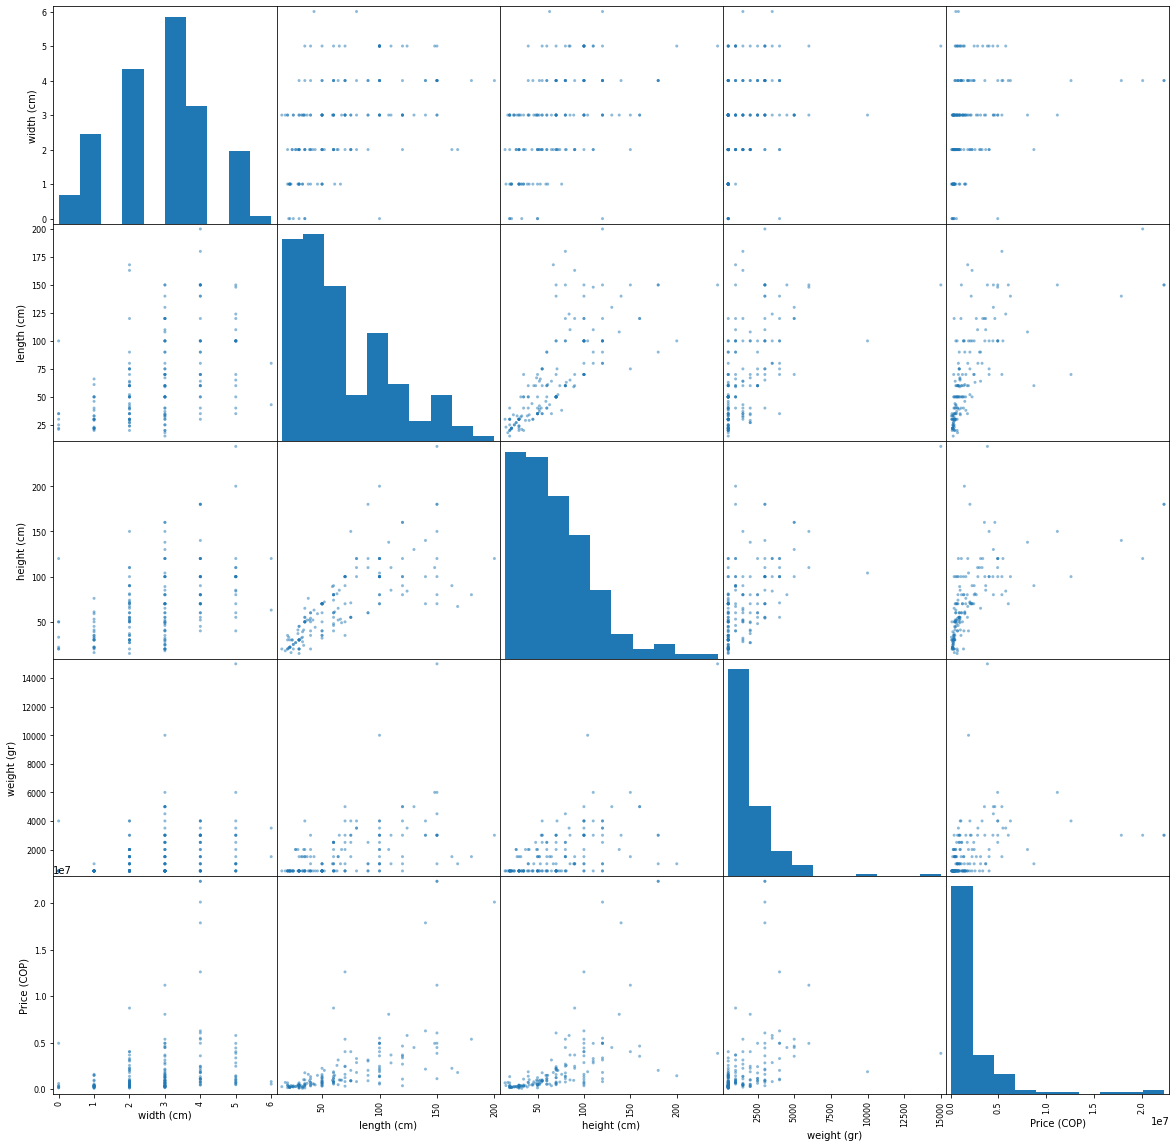

In [11]:
#Show the scatter matrix and histogram distribution of the quantitative variables
pd.plotting.scatter_matrix(dfQuant.iloc[:,0:5], figsize = (20,20))

In [12]:
#Check the normality test for each quantitative variable (using the shapiro test for small samples)
Quant = ['width (cm)', 'length (cm)', 'height (cm)', 'weight (gr)', 'Price (COP)']
for i in Quant:
    print(stats.shapiro(dfQuant[i]))

ShapiroResult(statistic=0.946530818939209, pvalue=5.9949379647150636e-06)
ShapiroResult(statistic=0.9043785929679871, pvalue=5.886950482647535e-09)
ShapiroResult(statistic=0.9154923558235168, pvalue=2.958454281554168e-08)
ShapiroResult(statistic=0.6609376668930054, pvalue=4.400377520016718e-18)
ShapiroResult(statistic=0.5395166873931885, pvalue=7.97612056049168e-21)


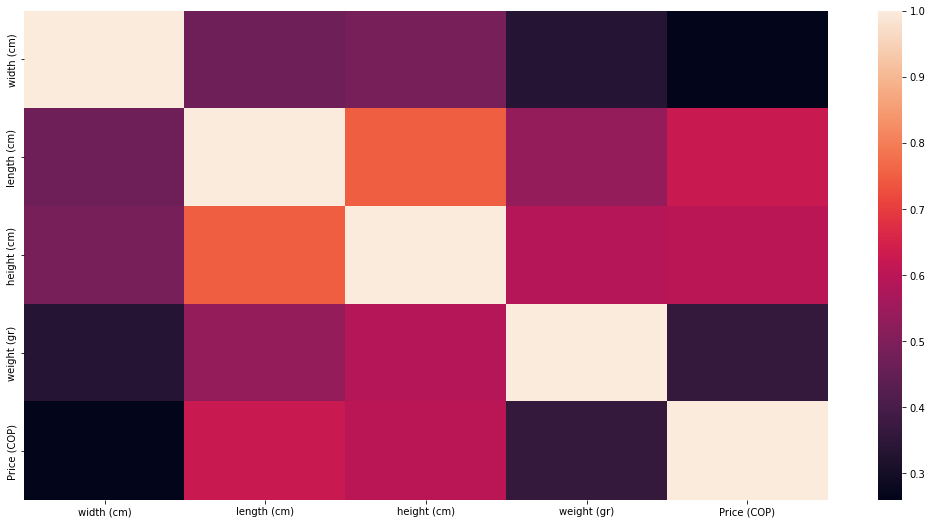

In [13]:
#Show the heatmap of correlations between the quantitative variables
plt.figure(figsize=(18,9))
sns.heatmap(dfQuant.corr(method="pearson"))

In [14]:
#plot color scaled correlation matrix
corr = dfQuant.corr()
corr.style.background_gradient(cmap='coolwarm')

In [15]:
#Compute VIF data for each quantitative variable
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["features"] = dfQuant.columns
vif["vif_Factor"] = [variance_inflation_factor(dfQuant.values, i) for i in range(dfQuant.shape[1])]
vif

features  vif_Factor
0   width (cm)    5.504222
1  length (cm)   10.005201
2  height (cm)   10.892215
3  weight (gr)    2.955834
4  Price (COP)    2.319793

When the VIF value for each variable is greater than 10, there is **high** intercorrelation between the **quantitative variables** in the dataset. Therefore, it can be said that there is presence of multicolinearity.

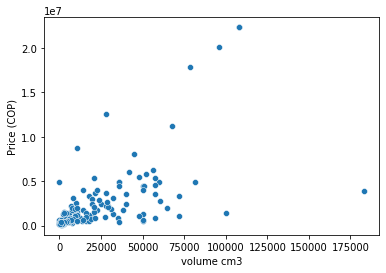

In [16]:
#Create a volume and area variable
dfQuant['volume cm3'] = dfQuant['width (cm)']*dfQuant['length (cm)']*df['height (cm)']
dfQuant['area cm2'] = dfQuant['length (cm)']*df['height (cm)']
sns.scatterplot(data=dfQuant, x="volume cm3", y="Price (COP)")

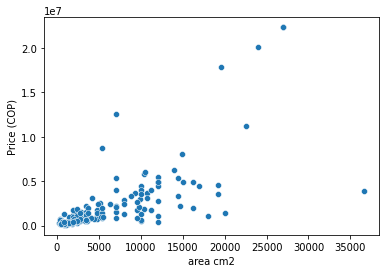

In [17]:
sns.scatterplot(data=dfQuant, x="area cm2", y="Price (COP)")

In [18]:
#Apply the natural log of the variables in the dataset, plot the behaviour
dfQuant['width_log'] = np.log(dfQuant['width (cm)'])
dfQuant['length_log'] = np.log(dfQuant['length (cm)'])
dfQuant['height_log'] = np.log(dfQuant['height (cm)'])
dfQuant['weight_log'] = np.log(dfQuant['weight (gr)'])
dfQuant['volume_log'] = np.log(dfQuant['volume cm3'])
dfQuant['area_log'] = np.log(dfQuant['area cm2'])
dfQuant['price_log'] = np.log(dfQuant['Price (COP)'])
dfQuant = dfQuant.drop(['Price (COP)','width (cm)','length (cm)','height (cm)','weight (gr)','volume cm3','area cm2'], axis=1)
corr = dfQuant.corr()
corr.style.background_gradient(cmap='coolwarm')

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


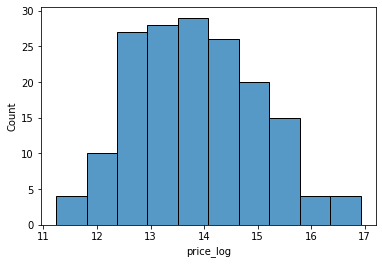

In [19]:
#View the distribution for log price
sns.histplot(data=dfQuant, x="price_log")

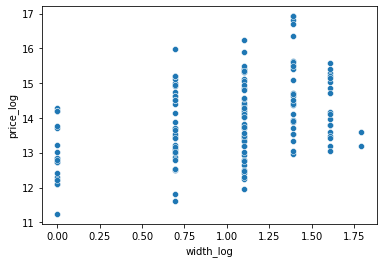

In [20]:
sns.scatterplot(data=dfQuant, x="width_log", y="price_log")

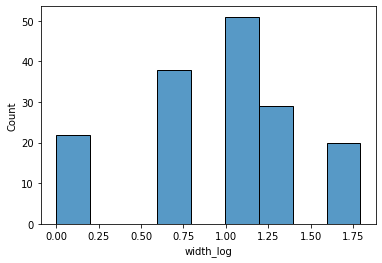

In [21]:
sns.histplot(data=dfQuant, x="width_log")

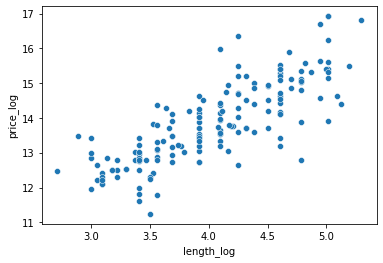

In [22]:
sns.scatterplot(data=dfQuant, x="length_log", y="price_log")

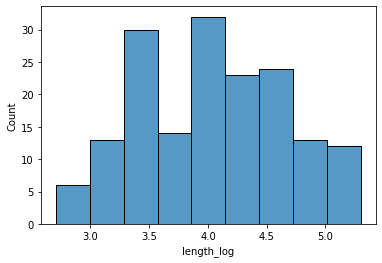

In [23]:
sns.histplot(data=dfQuant, x="length_log")

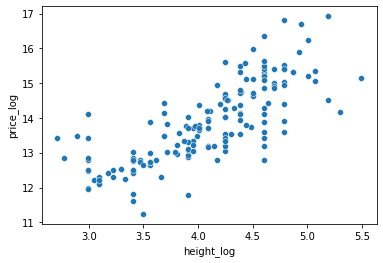

In [24]:
sns.scatterplot(data=dfQuant, x="height_log", y="price_log")

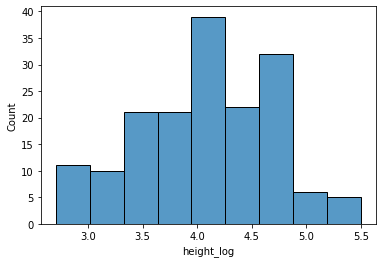

In [25]:
sns.histplot(data=dfQuant, x="height_log")

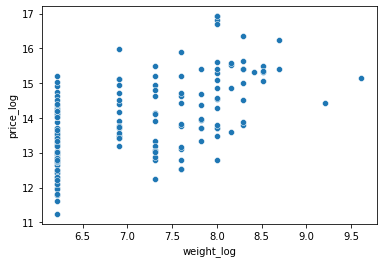

In [26]:
sns.scatterplot(data=dfQuant, x="weight_log", y="price_log")

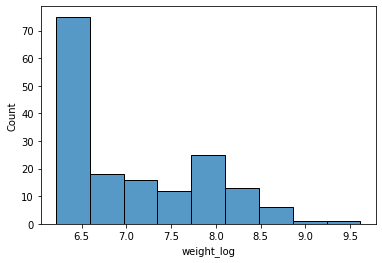

In [27]:
sns.histplot(data=dfQuant, x="weight_log")

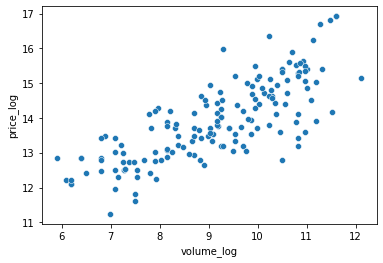

In [28]:
sns.scatterplot(data=dfQuant, x="volume_log", y="price_log")

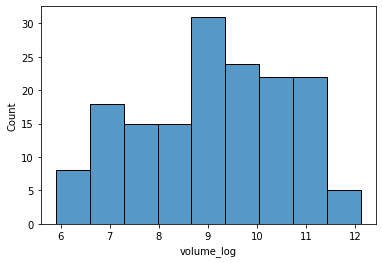

In [29]:
sns.histplot(data=dfQuant, x="volume_log")

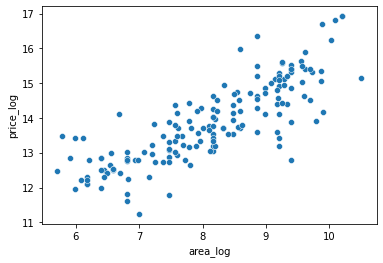

In [30]:
sns.scatterplot(data=dfQuant, x="area_log", y="price_log")

Looks that there's a positive correlation between the log area of an artwork and the log price of the artwork.

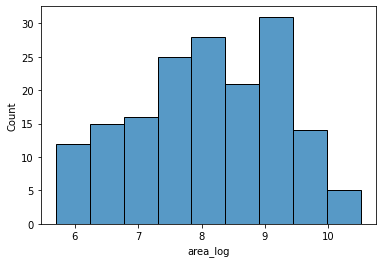

In [31]:
sns.histplot(data=dfQuant, x="area_log")

In [32]:
Quant2 = ['price_log', 'width_log', 'length_log', 'height_log', 'weight_log','volume_log','area_log']
for i in Quant2:
    print(stats.shapiro(dfQuant[i]))

ShapiroResult(statistic=0.9843777418136597, pvalue=0.05788787826895714)
ShapiroResult(statistic=nan, pvalue=1.0)
ShapiroResult(statistic=0.9738759398460388, pvalue=0.003026392310857773)
ShapiroResult(statistic=0.9794976115226746, pvalue=0.01417187973856926)
ShapiroResult(statistic=0.8366641998291016, pvalue=2.20204887310671e-12)
ShapiroResult(statistic=nan, pvalue=1.0)
ShapiroResult(statistic=0.9706379175186157, pvalue=0.0013006948865950108)


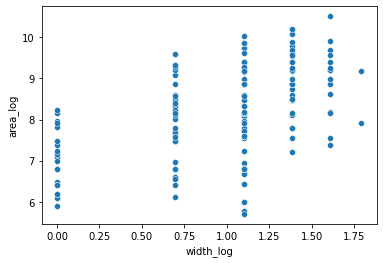

In [33]:
#Plot the correlation between area_log and width_log
sns.scatterplot(data=dfQuant, x="width_log", y="area_log")

#### 0.3.1.2. Categorical variables

In [34]:
#Classify the main categorical variables
dfQual = pd.DataFrame(data = df, columns = ['Style', 'Technique', 'Theme', 'Format','Orientation','Frame','Price (COP)'])
dfQual['price_log'] = np.log(dfQual['Price (COP)'])
dfQual = dfQual.drop(['Price (COP)'], axis=1)
dfQual.head(3)

Style       Technique      Theme  Format Orientation Frame  price_log
0    Abstract         Acrylic   Abstract  Medium  Horizontal    No  12.653332
1   Landscape  Fine Art Print   Abstract   Small      Square    No  13.480011
2  Figurative         Acrylic  Landscape   Small    Vertical   Yes  12.499182

In [35]:
#Count the variables (descriptive statistics)
Qual = ['Style', 'Technique', 'Theme', 'Format','Orientation','Frame']
for i in Qual:
    print(dfQual[i].value_counts())
    print("")

Abstract        51
Figurative      30
Human figure    19
Nature          19
Landscape       10
Portrait         7
Expresionist     7
Street Art       6
Geometric        5
Realist          4
Pop Art          3
Architecture     3
Surrealist       2
Minimalist       1
Name: Style, dtype: int64

Acrylic               68
Oil                   37
Mixed                 26
Graphite               9
Fine Art Print         6
Aquarelle              6
Digital photograph     4
Color pencils          3
Pastel                 2
Ink                    2
Grabed                 1
Canvasgraphic          1
Analog photograph      1
Metal                  1
Name: Technique, dtype: int64

Abstract         54
Animals          28
Nature           14
Landscape        13
Human figure     12
Portrait          9
Colorful          7
Floral            5
Figurative        5
Modern            4
Graffiti          3
Nude              3
Still life        3
Architecture      2
Realism           1
Religious Art     1
Minima

In [36]:
#Analyze the relationship between the categorical variable "Theme & Style" using the Chi Square Test for independence

#H0 : The categorical variables are independent, there is no relationship between the two categorical variables.
#H1: The categorical variables are dependent, there is a relationship between the two categorical variables.

ct_1 = pd.crosstab(dfQual.Style, dfQual.Theme, margins=True)
obs = np.array([ct_1.iloc[0][0:18].values,
                  ct_1.iloc[1][0:18].values,
                   ct_1.iloc[2][0:18].values,
                     ct_1.iloc[3][0:18].values,
                        ct_1.iloc[4][0:18].values,
                            ct_1.iloc[5][0:18].values,
                               ct_1.iloc[6][0:18].values,
                                  ct_1.iloc[7][0:18].values,
                                      ct_1.iloc[8][0:18].values,
                                        ct_1.iloc[9][0:18].values,
                                          ct_1.iloc[10][0:18].values,
                                            ct_1.iloc[11][0:18].values,
                                                ct_1.iloc[12][0:18].values,
                                                   ct_1.iloc[13][0:18].values])
print(' The Chi-square statistic is: \n The p-value is: \n The degrees of freedoms are: \n')
stats.chi2_contingency(obs)[0:3]

 The Chi-square statistic is: 
 The p-value is: 
 The degrees of freedoms are: 



(636.2585044540533, 7.511745640749958e-42, 221)

Conclusion is to reject the null hypothesis considering a 5% significance level. Therefore there's a relationship between Theme and Style.

In [37]:
ct_1

Theme         Abstract  Animals  Architecture  B&W  Colorful  Digital Art  \
Style                                                                       
Abstract            37        0             0    0         3            0   
Architecture         0        2             0    0         1            0   
Expresionist         0        2             0    0         0            0   
Figurative           5       10             0    0         1            0   
Geometric            3        1             0    0         0            0   
Human figure         3        0             0    0         1            0   
Landscape            1        0             0    0         0            1   
Minimalist           0        0             0    1         0            0   
Nature               2        9             1    0         0            0   
Pop Art              1        0             0    0         1            0   
Portrait             0        2             0    0         0            0   
Realist              1        2             0    0         0            0   
Street Art           1        0             1    0         0            0   
Surrealist           0        0             0    0         0            0   
All                 54       28             2    1         7            1   

Theme         Figurative  Floral  Graffiti  Human figure  Landscape  \
Style                                                                 
Abstract               0       3         0             0          3   
Architecture           0       0         0             0          0   
Expresionist           0       0         0             2          1   
Figurative             2       0         0             2          3   
Geometric              1       0         0             0          0   
Human figure           1       0         0             6          0   
Landscape              0       0         0             0          4   
Minimalist             0       0         0             0          0   
Nature                 0       2         0             0          1   
Pop Art                0       0         0             0          0   
Portrait               0       0         0             1          0   
Realist                0       0         0             0          0   
Street Art             1       0         3             0          0   
Surrealist             0       0         0             1          1   
All                    5       5         3            12         13   

Theme         Minimalist  Modern  Nature  Nude  Portrait  Realism  \
Style                                                               
Abstract               1       1       2     0         0        0   
Architecture           0       0       0     0         0        0   
Expresionist           0       0       1     0         1        0   
Figurative             0       0       4     0         1        0   
Geometric              0       0       0     0         0        0   
Human figure           0       2       0     3         3        0   
Landscape              0       0       4     0         0        0   
Minimalist             0       0       0     0         0        0   
Nature                 0       1       3     0         0        0   
Pop Art                0       0       0     0         0        0   
Portrait               0       0       0     0         4        0   
Realist                0       0       0     0         0        1   
Street Art             0       0       0     0         0        0   
Surrealist             0       0       0     0         0        0   
All                    1       4      14     3         9        1   

Theme         Religious Art  Still life  All  
Style                                         
Abstract                  0           1   51  
Architecture              0           0    3  
Expresionist              0           0    7  
Figurative                0           2   30  
Geometric                 

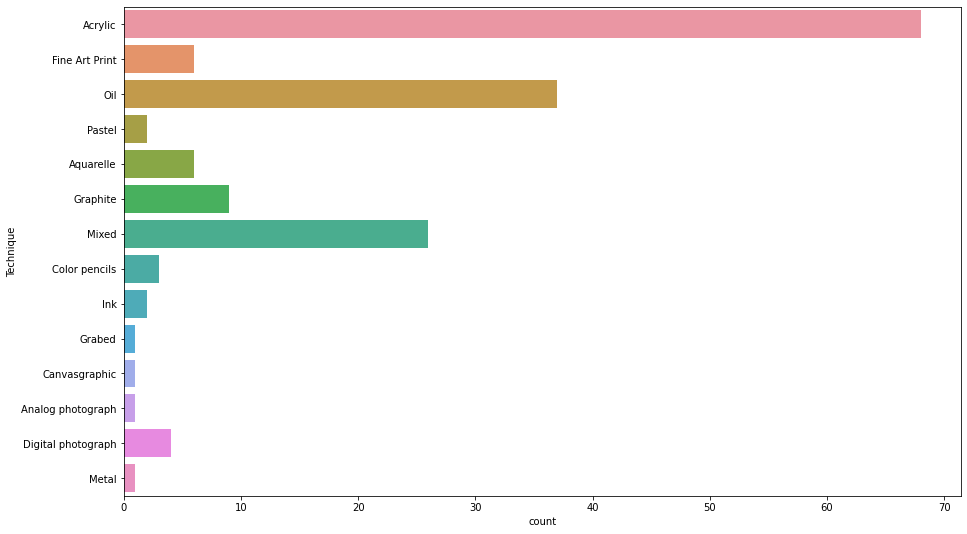

In [38]:
#See the distribution for technique
plt.figure(figsize=(15,9))
sns.countplot(data=dfQual, y="Technique")

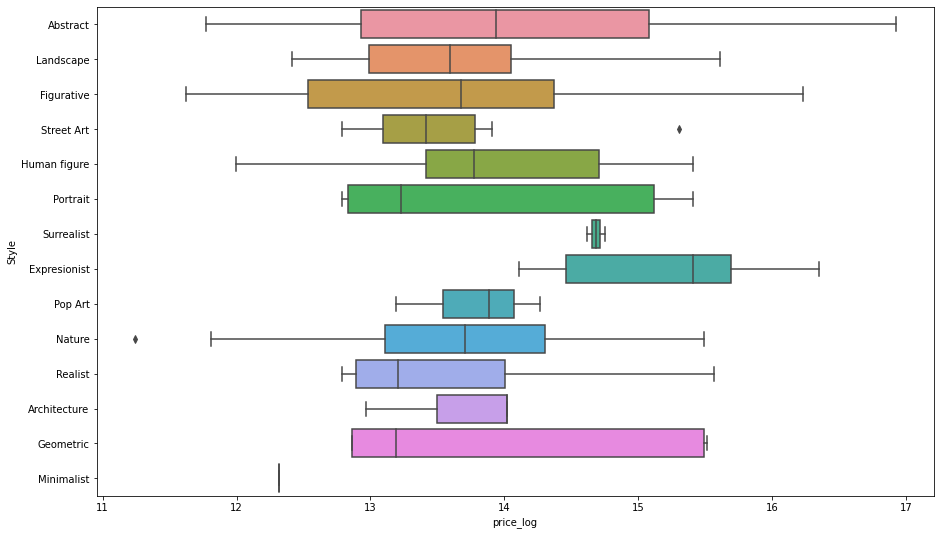

In [39]:
#Explore the relationship of each categorical variable to the target "price_log"
plt.figure(figsize=(15,9))
sns.boxplot(data=dfQual, x="price_log", y="Style")

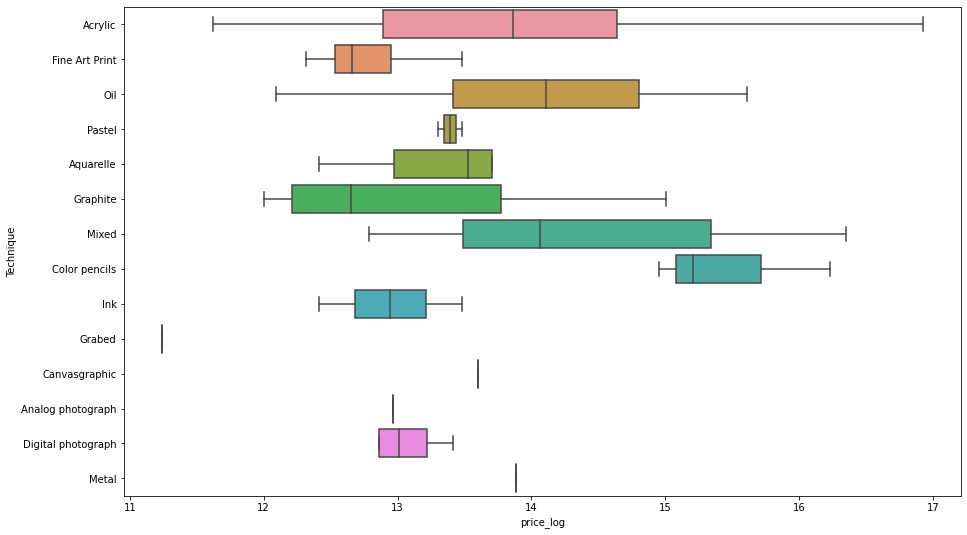

In [40]:
plt.figure(figsize=(15,9))
sns.boxplot(data=dfQual, x="price_log", y="Technique")

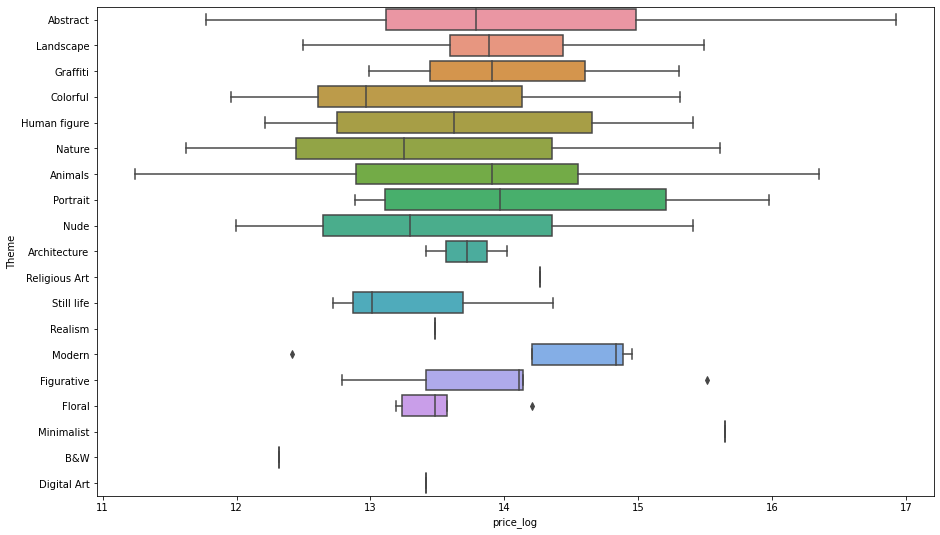

In [41]:
plt.figure(figsize=(15,9))
sns.boxplot(data=dfQual, x="price_log", y="Theme")

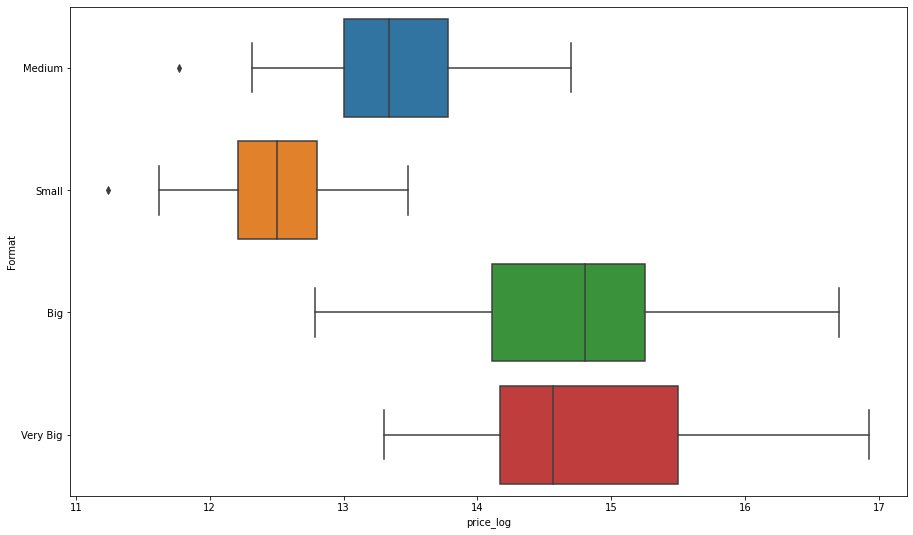

In [42]:
plt.figure(figsize=(15,9))
sns.boxplot(data=dfQual, x="price_log", y="Format")

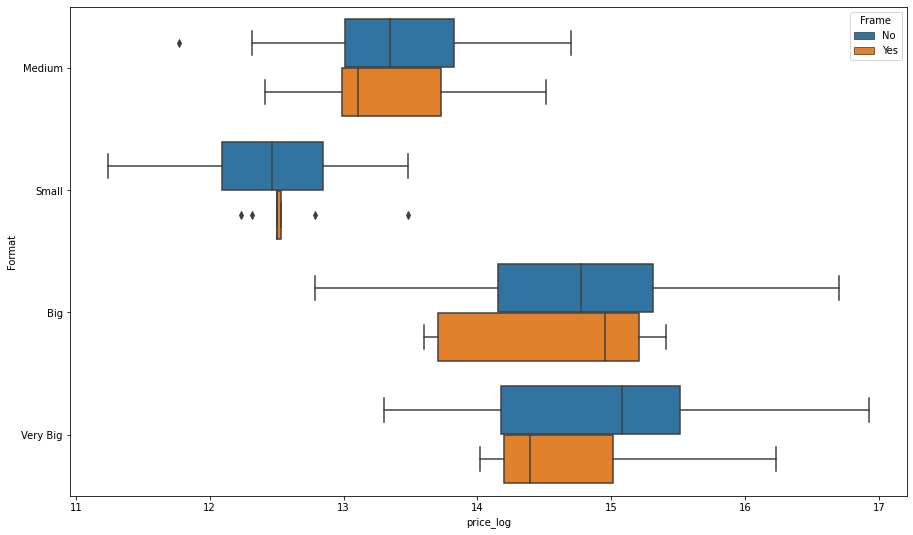

In [43]:
plt.figure(figsize=(15,9))
sns.boxplot(data=dfQual, x="price_log", y="Format", hue = "Frame")

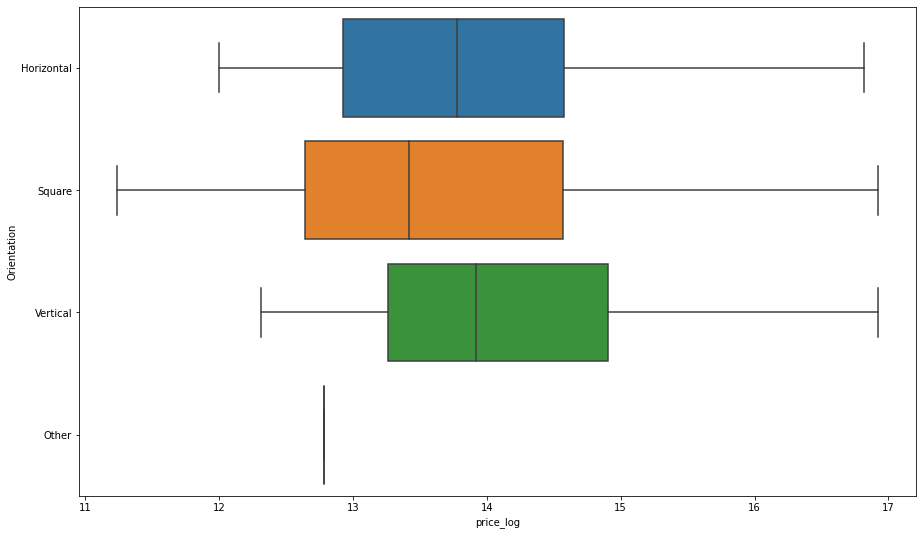

In [44]:
plt.figure(figsize=(15,9))
sns.boxplot(data=dfQual, x="price_log", y="Orientation")

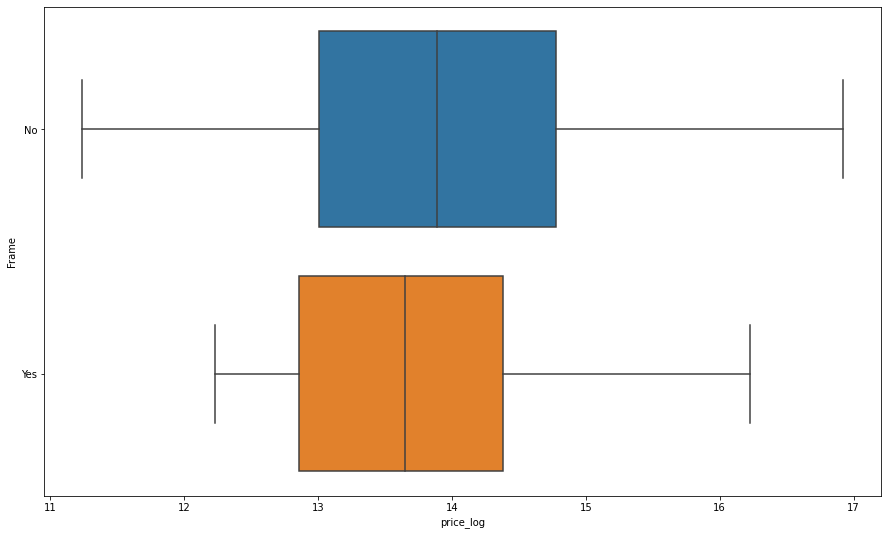

In [45]:
plt.figure(figsize=(15,9))
sns.boxplot(data=dfQual, x="price_log", y="Frame")

## 0.4. Machine Learning regression models (AutoML)

Based on the visualizations of the Exploratory Data Analysis for each quantitative and qualitative variables in response to the target "price_log" variable, the next step is to generate the regression models considering feature selection in the dataset and visualize the error metrics. 

The question we would like to know: Which covariates are the best predictors of an artwork selling price?

### 0.4.1. Build an initial Econometric model

In order to make better accuracy when predicting the response variable "price_log", is a good idea to create a basic linear regression model so that feature selection for the final dataset can be represented in an effective way. In that sense, we want to know which covariates are "useful" to predict the final price of the artwork based on the p-values of the linear regression $\beta_{i}$ parameters.

The model:

ln($y_{i}$) = $\beta_{0}$ + $\sum_{j = 1}^{n} \beta_{j} * ln(x_{j,i})$

Where $y_{i}$ is the selling price of the artwork ${i}$ (response variable), $x_{j,i}$ is the covariate ${j}$ used to predict the selling price of the artwork ${i}$ and $\beta_{j}$ is the hyperparameter coefficient of the linear regression model.

In [46]:
#Merging the two datasets above
dfQual = dfQual.drop(['price_log'], axis=1)
initial_df = pd.concat([dfQual, dfQuant], axis=1, join='inner')
initial_df = initial_df.drop(['Technique','Theme','length_log','height_log','volume_log','Orientation','Frame','Style','Format','width_log'], axis=1)
initial_df.head(5)

weight_log  area_log  price_log
0    6.214608  7.803843  12.653332
1    6.214608  5.780744  13.480011
2    6.214608  6.579251  12.499182
3    6.907755  9.143132  15.114142
4    8.006368  9.210340  15.301533

In [47]:
X = initial_df.iloc[:,0:2]
Y = initial_df['price_log']
X, Y

(     weight_log  area_log
 0      6.214608  7.803843
 1      6.214608  5.780744
 2      6.214608  6.579251
 3      6.907755  9.143132
 4      8.006368  9.210340
 ..          ...       ...
 162    7.313220  6.802395
 163    6.214608  6.802395
 164    6.214608  6.396930
 165    6.214608  6.182085
 166    6.214608  6.802395
 
 [167 rows x 2 columns], 0      12.653332
 1      13.480011
 2      12.499182
 3      15.114142
 4      15.301533
          ...    
 162    13.010007
 163    11.806035
 164    12.859184
 165    12.211498
 166    12.786863
 Name: price_log, Length: 167, dtype: float64)

In [48]:
#import from the Sklearn library the train_test_split method
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 123)

In [49]:
from sklearn.linear_model import LinearRegression
OLS = LinearRegression()
OLS.fit(X_train,Y_train)

LinearRegression()

In [50]:
#Display the intercept and coefficients of the OLS model
print("The intercept is: " + str(OLS.intercept_))
print("The set of coefficients are: \n" + str(OLS.coef_))
print("The R-Square value of the training dataset is: " + str(OLS.score(X_train, Y_train)))

The intercept is: 6.583690378845496
The set of coefficients are: 
[0.23239349 0.69550009]
The R-Square value of the training dataset is: 0.6683835770792435


In [51]:
#predicting with OLS
Y_pred = OLS.predict(X_test)
print("The predicted values are: \n")
print(Y_pred)

The predicted values are: 

[15.45899925 14.43371742 13.86464893 13.74615115 14.0051599  12.54327825
 13.76332366 12.32756547 12.75899103 13.69646821 14.29726469 14.43746918
 12.50538172 15.42251544 13.92382913 14.98268714 14.66063607 14.83605968
 13.56989179 12.93460033 14.29726469 12.27690711 14.50781575 13.70356604
 14.64832673 14.93032775 14.64832673 13.69944521 14.27345461 13.47679246
 13.54271931 14.88404423 13.52667296 15.5751956 ]


In [52]:
#Calculate the Mean Absolute Percentage Error for the prediction
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true))
MAPE = mean_absolute_percentage_error(Y_test,Y_pred)
print("The Mean Absolute Percentage Error is: " + str(MAPE))

The Mean Absolute Percentage Error is: 0.03272409418549643


In [53]:
performance = pd.DataFrame({'Predictions': Y_pred,'Test data': Y_test})
performance['error'] = performance['Test data'] - performance['Predictions']
performance.head()

Predictions  Test data     error
144    15.458999  16.816671  1.357672
65     14.433717  15.207233  0.773515
158    13.864649  13.415473 -0.449176
142    13.746151  14.203931  0.457779
89     14.005160  14.203931  0.198771

In [54]:
#preparing data for plotting
performance.reset_index(drop=True,inplace = True)
performance.reset_index(inplace=True)
performance.head()

index  Predictions  Test data     error
0      0    15.458999  16.816671  1.357672
1      1    14.433717  15.207233  0.773515
2      2    13.864649  13.415473 -0.449176
3      3    13.746151  14.203931  0.457779
4      4    14.005160  14.203931  0.198771

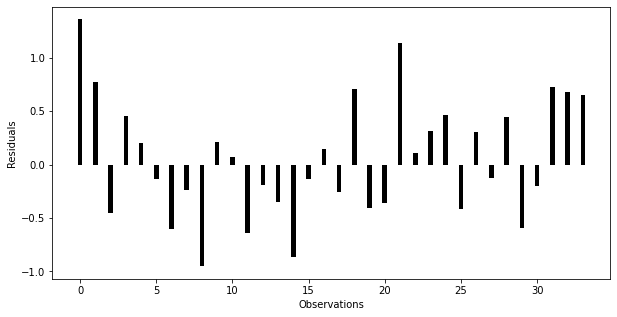

In [55]:
#Plot the residuals
fig = plt.figure(figsize = (10,5))
plt.bar('index','error', data = performance, color = 'black', width = 0.3)
plt.xlabel("Observations")
plt.ylabel("Residuals")
plt.show()

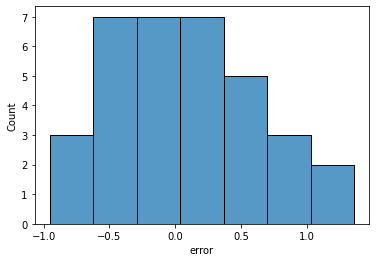

In [56]:
#See if the residuals follow a normal distribution
sns.histplot(data=performance, x="error")

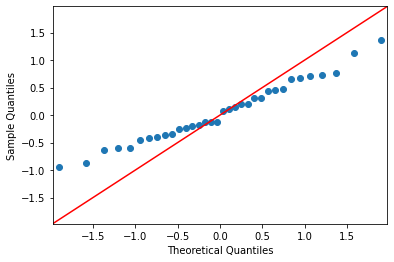

In [57]:
#plot the QQ plot (probability plot)
import pylab as py
sm.qqplot(performance['error'], line ='45')
py.show()

In [58]:
#Perform the Shapiro Wilks Test to check normality
print("The SW Test Statistic is: "+ str(stats.shapiro(performance['error']).statistic))
print("The SW p-value is: "+ str(stats.shapiro(performance['error']).pvalue))

The SW Test Statistic is: 0.978256344795227
The SW p-value is: 0.7170084714889526


In [59]:
#Add the regression constant
X_train = sm.add_constant(X_train)
model_OLS = sm.OLS(Y_train, X_train).fit()
print("The summary results are as following: \n")
print(model_OLS.summary())

The summary results are as following: 

                            OLS Regression Results                            
Dep. Variable:              price_log   R-squared:                       0.668
Model:                            OLS   Adj. R-squared:                  0.663
Method:                 Least Squares   F-statistic:                     131.0
Date:                Wed, 05 Oct 2022   Prob (F-statistic):           6.94e-32
Time:                        19:21:18   Log-Likelihood:                -135.67
No. Observations:                 133   AIC:                             277.3
Df Residuals:                     130   BIC:                             286.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       

In [60]:
#Perform the Breusch Pagan Test to check Homocedasticity
from statsmodels.compat import lzip
import statsmodels.stats.api as sms
names = ['Lagrange multiplier statistic', 'p-value',
        'f-value', 'f p-value']
test = sms.het_breuschpagan(model_OLS.resid, model_OLS.model.exog)

lzip(names, test)

[('Lagrange multiplier statistic', 3.975353552829449),
 ('p-value', 0.13701336866550723),
 ('f-value', 2.002702491726774),
 ('f p-value', 0.13911289452768788)]

### 0.4.2. Generate the final dataset

In [61]:
#Merging the two datasets above
final_df = pd.concat([dfQual, dfQuant], axis=1, join='inner')
final_df = final_df.drop(['Theme','length_log','height_log','volume_log','Orientation','Frame','Style','width_log'], axis=1)
final_df.head(5)

Technique  Format  weight_log  area_log  price_log
0         Acrylic  Medium    6.214608  7.803843  12.653332
1  Fine Art Print   Small    6.214608  5.780744  13.480011
2         Acrylic   Small    6.214608  6.579251  12.499182
3             Oil     Big    6.907755  9.143132  15.114142
4         Acrylic     Big    8.006368  9.210340  15.301533

In [62]:
final_df.shape

(167, 5)

In [63]:
data = final_df.sample(frac=0.9, random_state=786)
data_unseen = final_df.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (150, 5)
Unseen Data For Predictions: (17, 5)


### 0.4.3. Setting up Environment in PyCaret

In [64]:
from pycaret.regression import *
experiment = setup(data = data, target = 'price_log', session_id=123,
                   normalize = True, transformation=True, transform_target = True,
                   train_size=0.8, multicollinearity_threshold = 0.95) 

Description             Value
0                               session_id               123
1                                   Target         price_log
2                            Original Data          (150, 5)
3                           Missing Values             False
4                         Numeric Features                 2
5                     Categorical Features                 2
6                         Ordinal Features             False
7                High Cardinality Features             False
8                  High Cardinality Method              None
9                    Transformed Train Set         (120, 19)
10                    Transformed Test Set          (30, 19)
11                      Shuffle Train-Test              True
12                     Stratify Train-Test             False
13                          Fold Generator             KFold
14                             Fold Number                10
15                                CPU Jobs                -1
16                                 Use GPU             False
17                          Log Experiment             False
18                         Experiment Name  reg-default-name
19                                     USI              bee6
20                         Imputation Type            simple
21          Iterative Imputation Iteration              None
22                         Numeric Imputer              mean
23      Iterative Imputation Numeric Model              None
24                     Categorical Imputer          constant
25  Iterative Imputation Categorical Model              None
26           Unknown Categoricals Handling    least_frequent
27                               Normalize              True
28                        Normalize Method            zscore
29                          Transformation              True
30                   Transformation Method       yeo-johnson
31                                     PCA             False
32                              PCA Method              None
33                          PCA Components              None
34                     Ignore Low Variance             False
35                     Combine Rare Levels             False
36                    Rare Level Threshold              None
37                         Numeric Binning             False
38                         Remove Outliers             False
39                      Outliers Threshold              None
40                Remove Multicollinearity             False
41             Multicollinearity Threshold              None
42             Remove Perfect Collinearity              True
43                              Clustering             False
44                    Clustering Iteration              None
45                     Polynomial Features             False
46                       Polynomial Degree              None
47                    Trignometry Features             False
48                    Polynomial Threshold              None
49                          Group Features             False
50                       Feature Selection             False
51                Feature Selection Method           classic
52            Features Selection Threshold              None
53                     Feature Interaction             False
54                           Feature Ratio             False
55                   Interaction Threshold              None
56                        Transform Target              True
57                 Transform Target Method           box-cox

INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[], ml_usecase='regression',
                                      numerical_features=[], target='price_log',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strate...
                                                  random_state_quantile=123,
                                                  target='price_log')),
                ('binn', 'passthrough'), ('rem_outliers', 'pass

### 0.4.4. Comparing All Models

In [65]:
#Use the RMSLE error metric to evaluate performance
best = compare_models(sort = 'RMSLE',n_select = 3)

Model     MAE     MSE    RMSE      R2  \
lightgbm  Light Gradient Boosting Machine  0.4529  0.3219  0.5513  0.6515   
ridge                    Ridge Regression  0.4477  0.3217  0.5543  0.6536   
br                         Bayesian Ridge  0.4508  0.3240  0.5549  0.6507   
lr                      Linear Regression  0.4449  0.3237  0.5575  0.6524   
omp           Orthogonal Matching Pursuit  0.4594  0.3376  0.5669  0.6317   
huber                     Huber Regressor  0.4478  0.3381  0.5704  0.6292   
knn                 K Neighbors Regressor  0.4854  0.3764  0.5944  0.5981   
gbr           Gradient Boosting Regressor  0.4663  0.3683  0.5945  0.6041   
ada                    AdaBoost Regressor  0.4903  0.3715  0.5917  0.6017   
et                  Extra Trees Regressor  0.4774  0.3803  0.6042  0.5980   
rf                Random Forest Regressor  0.4836  0.3875  0.6054  0.5832   
dt                Decision Tree Regressor  0.5775  0.5583  0.7297  0.4048   
par          Passive Aggressive Regressor  0.6365  0.6035  0.7539  0.3641   
en                            Elastic Net  0.7182  0.7414  0.8467  0.2732   
lasso                    Lasso Regression  0.8738  1.0960  1.0348 -0.0886   
llar         Lasso Least Angle Regression  0.8738  1.0960  1.0348 -0.0886   
dummy                     Dummy Regressor  0.8738  1.0960  1.0348 -0.0886   
lar                Least Angle Regression  0.6300  2.6306  1.1170 -2.3117   

           RMSLE    MAPE  TT (Sec)  
lightgbm  0.0372  0.0328     0.110  
ridge     0.0373  0.0324     0.024  
br        0.0373  0.0326     0.026  
lr        0.0374  0.0322     0.448  
omp       0.0381  0.0332     0.032  
huber     0.0383  0.0323     0.035  
knn       0.0398  0.0350     0.081  
gbr       0.0400  0.0338     0.037  
ada       0.0401  0.0355     0.050  
et        0.0408  0.0347     0.197  
rf        0.0410  0.0350     0.243  
dt        0.0495  0.0423     0.040  
par       0.0513  0.0462     0.023  
en        0.0571  0.0521     0.040  
lasso     0.0699  0.0635     0.026  
llar      0.0699  0.0635     0.031  
dummy     0.0699  0.0635     0.018  
lar       0.1453  0.0465     0.034

INFO:logs:create_model_container: 18
INFO:logs:master_model_container: 18
INFO:logs:display_container: 2
INFO:logs:[PowerTransformedTargetRegressor(boosting_type='gbdt', class_weight=None,
                                colsample_bytree=1.0, importance_type='split',
                                learning_rate=0.1, max_depth=-1,
                                min_child_samples=20, min_child_weight=0.001,
                                min_split_gain=0.0, n_estimators=100, n_jobs=-1,
                                num_leaves=31, objective=None,
                                power_transformer_method='box-cox',
                                power_transformer_standardize=True,
                                random_state=1...
                                                        importance_type='split',
                                                        learning_rate=0.1,
                                                        max_depth=-1,
                                 

In [66]:
print(best)

[PowerTransformedTargetRegressor(boosting_type='gbdt', class_weight=None,
                                colsample_bytree=1.0, importance_type='split',
                                learning_rate=0.1, max_depth=-1,
                                min_child_samples=20, min_child_weight=0.001,
                                min_split_gain=0.0, n_estimators=100, n_jobs=-1,
                                num_leaves=31, objective=None,
                                power_transformer_method='box-cox',
                                power_transformer_standardize=True,
                                random_state=1...
                                                        importance_type='split',
                                                        learning_rate=0.1,
                                                        max_depth=-1,
                                                        min_child_samples=20,
                                                        min_child_weig

In [67]:
models()

INFO:logs:gpu_param set to False


Name  \
ID                                            
lr                        Linear Regression   
lasso                      Lasso Regression   
ridge                      Ridge Regression   
en                              Elastic Net   
lar                  Least Angle Regression   
llar           Lasso Least Angle Regression   
omp             Orthogonal Matching Pursuit   
br                           Bayesian Ridge   
ard       Automatic Relevance Determination   
par            Passive Aggressive Regressor   
ransac              Random Sample Consensus   
tr                       TheilSen Regressor   
huber                       Huber Regressor   
kr                             Kernel Ridge   
svm               Support Vector Regression   
knn                   K Neighbors Regressor   
dt                  Decision Tree Regressor   
rf                  Random Forest Regressor   
et                    Extra Trees Regressor   
ada                      AdaBoost Regressor   
gbr             Gradient Boosting Regressor   
mlp                           MLP Regressor   
lightgbm    Light Gradient Boosting Machine   
dummy                       Dummy Regressor   

                                                  Reference  Turbo  
ID                                                                  
lr              sklearn.linear_model._base.LinearRegression   True  
lasso        sklearn.linear_model._coordinate_descent.Lasso   True  
ridge                     sklearn.linear_model._ridge.Ridge   True  
en        sklearn.linear_model._coordinate_descent.Elast...   True  
lar                  sklearn.linear_model._least_angle.Lars   True  
llar            sklearn.linear_model._least_angle.LassoLars   True  
omp       sklearn.linear_model._omp.OrthogonalMatchingPu...   True  
br                sklearn.linear_model._bayes.BayesianRidge   True  
ard               sklearn.linear_model._bayes.ARDRegression  False  
par       sklearn.linear_model._passive_aggressive.Passi...   True  
ransac         sklearn.linear_model._ransac.RANSACRegressor  False  
tr        sklearn.linear_model._theil_sen.TheilSenRegressor  False  
huber            sklearn.linear_model._huber.HuberRegressor   True  
kr                         sklearn.kernel_ridge.KernelRidge  False  
svm                                sklearn.svm._classes.SVR  False  
knn       sklearn.neighbors._regression.KNeighborsRegressor   True  
dt              sklearn.tree._classes.DecisionTreeRegressor   True  
rf           sklearn.ensemble._forest.RandomForestRegressor   True  
et             sklearn.ensemble._forest.ExtraTreesRegressor   True  
ada       sklearn.ensemble._weight_boosting.AdaBoostRegr...   True  
gbr          sklearn.ensemble._gb.GradientBoostingRegressor   True  
mlp       sklearn.neural_network._multilayer_perceptron....  False  
lightgbm                     lightgbm.sklearn.LGBMRegressor   True  
dummy                          sklearn.dummy.DummyRegressor   True

#### 0.4.4.1. AdaBoost Regressor

In [68]:
ada = create_model('ada')

MAE     MSE    RMSE      R2   RMSLE    MAPE
Fold                                                
0     0.4208  0.2692  0.5188  0.8032  0.0345  0.0300
1     0.7038  0.7299  0.8544 -0.1661  0.0581  0.0500
2     0.2994  0.1216  0.3487  0.8214  0.0233  0.0215
3     0.5845  0.6240  0.7899  0.6701  0.0492  0.0398
4     0.5016  0.3322  0.5764  0.7598  0.0392  0.0368
5     0.4323  0.2448  0.4948  0.6664  0.0337  0.0315
6     0.5570  0.4517  0.6721  0.5055  0.0485  0.0435
7     0.5782  0.4456  0.6675  0.5379  0.0450  0.0413
8     0.3780  0.2199  0.4690  0.7198  0.0329  0.0284
9     0.4468  0.2756  0.5250  0.6994  0.0362  0.0325
Mean  0.4903  0.3715  0.5917  0.6017  0.0401  0.0355
Std   0.1122  0.1808  0.1463  0.2737  0.0096  0.0079

INFO:logs:create_model_container: 19
INFO:logs:master_model_container: 19
INFO:logs:display_container: 3
INFO:logs:PowerTransformedTargetRegressor(base_estimator=None, learning_rate=1.0,
                                loss='linear', n_estimators=50,
                                power_transformer_method='box-cox',
                                power_transformer_standardize=True,
                                random_state=123,
                                regressor=AdaBoostRegressor(base_estimator=None,
                                                            learning_rate=1.0,
                                                            loss='linear',
                                                            n_estimators=50,
                                                            random_state=123))
INFO:logs:create_model() succesfully completed......................................


In [69]:
tuned_ada = tune_model(ada)

MAE     MSE    RMSE      R2   RMSLE    MAPE
Fold                                                
0     0.3943  0.2494  0.4994  0.8177  0.0339  0.0285
1     0.6873  0.6071  0.7791  0.0302  0.0522  0.0488
2     0.2652  0.1029  0.3207  0.8489  0.0214  0.0190
3     0.6189  0.6984  0.8357  0.6308  0.0520  0.0421
4     0.4828  0.3247  0.5698  0.7652  0.0393  0.0358
5     0.4370  0.3131  0.5596  0.5734  0.0381  0.0315
6     0.5118  0.3892  0.6238  0.5740  0.0451  0.0401
7     0.5341  0.4377  0.6616  0.5460  0.0444  0.0381
8     0.4108  0.2198  0.4688  0.7200  0.0323  0.0305
9     0.3070  0.1717  0.4143  0.8128  0.0281  0.0220
Mean  0.4649  0.3514  0.5733  0.6319  0.0387  0.0336
Std   0.1241  0.1785  0.1507  0.2272  0.0095  0.0087

INFO:logs:create_model_container: 20
INFO:logs:master_model_container: 20
INFO:logs:display_container: 4
INFO:logs:PowerTransformedTargetRegressor(base_estimator=None, learning_rate=1e-06,
                                loss='linear', n_estimators=70,
                                power_transformer_method='box-cox',
                                power_transformer_standardize=True,
                                random_state=123,
                                regressor=AdaBoostRegressor(base_estimator=None,
                                                            learning_rate=1e-06,
                                                            loss='linear',
                                                            n_estimators=70,
                                                            random_state=123))
INFO:logs:tune_model() succesfully completed......................................


#### 0.4.4.2. Bayesian Ridge

In [70]:
br = create_model('br')

MAE     MSE    RMSE      R2   RMSLE    MAPE
Fold                                                
0     0.4029  0.2193  0.4682  0.8397  0.0313  0.0290
1     0.6803  0.5945  0.7711  0.0502  0.0523  0.0489
2     0.3826  0.2084  0.4565  0.6939  0.0295  0.0270
3     0.5722  0.5344  0.7310  0.7175  0.0453  0.0390
4     0.4655  0.3474  0.5894  0.7488  0.0407  0.0345
5     0.4043  0.2439  0.4938  0.6677  0.0341  0.0294
6     0.4549  0.3439  0.5865  0.6235  0.0422  0.0353
7     0.5142  0.4086  0.6392  0.5763  0.0426  0.0366
8     0.3696  0.2219  0.4710  0.7174  0.0319  0.0272
9     0.2618  0.1174  0.3426  0.8720  0.0232  0.0189
Mean  0.4508  0.3240  0.5549  0.6507  0.0373  0.0326
Std   0.1110  0.1447  0.1265  0.2173  0.0083  0.0078

INFO:logs:create_model_container: 21
INFO:logs:master_model_container: 21
INFO:logs:display_container: 5
INFO:logs:PowerTransformedTargetRegressor(alpha_1=1e-06, alpha_2=1e-06, alpha_init=None,
                                compute_score=False, copy_X=True,
                                fit_intercept=True, lambda_1=1e-06,
                                lambda_2=1e-06, lambda_init=None, n_iter=300,
                                normalize=False,
                                power_transformer_method='box-cox',
                                power_transformer_standardize=True,
                                regressor=BayesianRidge(alpha_1=1e-06,
                                                        alpha_2=1e-06,
                                                        alpha_init=None,
                                                        compute_score=False,
                                                        copy_X=True,
                                                

In [71]:
tuned_br = tune_model(br)

MAE     MSE    RMSE      R2   RMSLE    MAPE
Fold                                                
0     0.4115  0.2386  0.4885  0.8255  0.0323  0.0295
1     0.5865  0.5016  0.7082  0.1987  0.0481  0.0424
2     0.3496  0.1756  0.4191  0.7421  0.0271  0.0247
3     0.6135  0.6010  0.7753  0.6822  0.0483  0.0421
4     0.4854  0.3562  0.5968  0.7425  0.0410  0.0357
5     0.3826  0.2221  0.4713  0.6974  0.0324  0.0277
6     0.4695  0.3660  0.6050  0.5994  0.0434  0.0363
7     0.4401  0.3510  0.5924  0.6360  0.0398  0.0319
8     0.4366  0.2689  0.5185  0.6575  0.0353  0.0322
9     0.2545  0.1165  0.3413  0.8729  0.0231  0.0184
Mean  0.4430  0.3197  0.5516  0.6654  0.0371  0.0321
Std   0.1005  0.1405  0.1243  0.1746  0.0081  0.0071

INFO:logs:create_model_container: 22
INFO:logs:master_model_container: 22
INFO:logs:display_container: 6
INFO:logs:PowerTransformedTargetRegressor(alpha_1=0.1, alpha_2=0.1, alpha_init=None,
                                compute_score=True, copy_X=True,
                                fit_intercept=True, lambda_1=0.01,
                                lambda_2=1e-06, lambda_init=None, n_iter=300,
                                normalize=True,
                                power_transformer_method='box-cox',
                                power_transformer_standardize=True,
                                regressor=BayesianRidge(alpha_1=0.1,
                                                        alpha_2=0.1,
                                                        alpha_init=None,
                                                        compute_score=True,
                                                        copy_X=True,
                                                        fit_

#### 0.4.4.3. K Neighbors Regressor

In [72]:
knn = create_model('knn')

MAE     MSE    RMSE      R2   RMSLE    MAPE
Fold                                                
0     0.4777  0.3236  0.5689  0.7634  0.0376  0.0343
1     0.6853  0.7296  0.8541 -0.1655  0.0575  0.0490
2     0.3913  0.1854  0.4306  0.7277  0.0283  0.0279
3     0.6085  0.6851  0.8277  0.6378  0.0513  0.0410
4     0.4979  0.4294  0.6553  0.6896  0.0446  0.0369
5     0.5109  0.3456  0.5878  0.5292  0.0397  0.0367
6     0.4521  0.2963  0.5443  0.6756  0.0389  0.0345
7     0.5182  0.3524  0.5936  0.6346  0.0396  0.0369
8     0.4524  0.3119  0.5584  0.6027  0.0379  0.0333
9     0.2602  0.1046  0.3235  0.8859  0.0224  0.0194
Mean  0.4854  0.3764  0.5944  0.5981  0.0398  0.0350
Std   0.1090  0.1866  0.1518  0.2706  0.0095  0.0073

INFO:logs:create_model_container: 23
INFO:logs:master_model_container: 23
INFO:logs:display_container: 7
INFO:logs:PowerTransformedTargetRegressor(algorithm='auto', leaf_size=30,
                                metric='minkowski', metric_params=None,
                                n_jobs=-1, n_neighbors=5, p=2,
                                power_transformer_method='box-cox',
                                power_transformer_standardize=True,
                                regressor=KNeighborsRegressor(algorithm='auto',
                                                              leaf_size=30,
                                                              metric='minkowski',
                                                              metric_params=None,
                                                              n_jobs=-1,
                                                              n_neighbors=5,
                                                              p=2,
             

In [73]:
tuned_knn = tune_model(knn)

MAE     MSE    RMSE      R2   RMSLE    MAPE
Fold                                                
0     0.4189  0.2859  0.5347  0.7910  0.0361  0.0303
1     0.5439  0.4738  0.6884  0.2430  0.0465  0.0390
2     0.3220  0.1509  0.3884  0.7784  0.0261  0.0230
3     0.6503  0.6977  0.8353  0.6311  0.0520  0.0443
4     0.5215  0.3990  0.6316  0.7116  0.0432  0.0382
5     0.3463  0.2133  0.4619  0.7093  0.0313  0.0248
6     0.4617  0.3799  0.6164  0.5841  0.0451  0.0359
7     0.4774  0.3283  0.5730  0.6595  0.0385  0.0341
8     0.4638  0.3475  0.5895  0.5573  0.0402  0.0339
9     0.2531  0.0994  0.3153  0.8915  0.0210  0.0181
Mean  0.4459  0.3376  0.5634  0.6557  0.0380  0.0322
Std   0.1104  0.1624  0.1418  0.1675  0.0091  0.0077

INFO:logs:create_model_container: 24
INFO:logs:master_model_container: 24
INFO:logs:display_container: 8
INFO:logs:PowerTransformedTargetRegressor(algorithm='auto', leaf_size=30,
                                metric='minkowski', metric_params=None,
                                n_jobs=-1, n_neighbors=29, p=2,
                                power_transformer_method='box-cox',
                                power_transformer_standardize=True,
                                regressor=KNeighborsRegressor(algorithm='auto',
                                                              leaf_size=30,
                                                              metric='minkowski',
                                                              metric_params=None,
                                                              n_jobs=-1,
                                                              n_neighbors=29,
                                                              p=2,
           

#### 0.4.4.4. Light Gradient Boosting Machine

In [74]:
lightgbm = create_model('lightgbm')

MAE     MSE    RMSE      R2   RMSLE    MAPE
Fold                                                
0     0.3934  0.2235  0.4728  0.8366  0.0322  0.0289
1     0.7240  0.6790  0.8240 -0.0847  0.0552  0.0511
2     0.3269  0.1441  0.3795  0.7884  0.0249  0.0233
3     0.5386  0.5273  0.7261  0.7212  0.0451  0.0367
4     0.4545  0.3162  0.5623  0.7714  0.0385  0.0337
5     0.3739  0.1960  0.4428  0.7329  0.0299  0.0271
6     0.4961  0.3489  0.5907  0.6181  0.0427  0.0387
7     0.4991  0.3798  0.6163  0.6061  0.0414  0.0359
8     0.3464  0.1827  0.4274  0.7673  0.0297  0.0258
9     0.3764  0.2219  0.4710  0.7580  0.0321  0.0273
Mean  0.4529  0.3219  0.5513  0.6515  0.0372  0.0328
Std   0.1130  0.1613  0.1342  0.2547  0.0086  0.0078

INFO:logs:create_model_container: 25
INFO:logs:master_model_container: 25
INFO:logs:display_container: 9
INFO:logs:PowerTransformedTargetRegressor(boosting_type='gbdt', class_weight=None,
                                colsample_bytree=1.0, importance_type='split',
                                learning_rate=0.1, max_depth=-1,
                                min_child_samples=20, min_child_weight=0.001,
                                min_split_gain=0.0, n_estimators=100, n_jobs=-1,
                                num_leaves=31, objective=None,
                                power_transformer_method='box-cox',
                                power_transformer_standardize=True,
                                random_state=1...
                                                        importance_type='split',
                                                        learning_rate=0.1,
                                                        max_depth=-1,
                                  

In [75]:
tuned_lightgbm = tune_model(lightgbm)

MAE     MSE    RMSE      R2   RMSLE    MAPE
Fold                                                
0     0.4639  0.2646  0.5144  0.8066  0.0348  0.0337
1     0.7177  0.6928  0.8323 -0.1068  0.0556  0.0515
2     0.2355  0.1004  0.3168  0.8526  0.0208  0.0168
3     0.5859  0.6768  0.8227  0.6422  0.0509  0.0397
4     0.4374  0.2721  0.5216  0.8033  0.0361  0.0325
5     0.4479  0.2606  0.5105  0.6450  0.0343  0.0323
6     0.4788  0.3346  0.5785  0.6337  0.0415  0.0369
7     0.5267  0.4252  0.6521  0.5590  0.0435  0.0377
8     0.3520  0.1956  0.4423  0.7508  0.0308  0.0263
9     0.3345  0.2099  0.4581  0.7711  0.0310  0.0240
Mean  0.4580  0.3433  0.5649  0.6357  0.0379  0.0331
Std   0.1286  0.1889  0.1553  0.2633  0.0097  0.0090

INFO:logs:create_model_container: 26
INFO:logs:master_model_container: 26
INFO:logs:display_container: 10
INFO:logs:PowerTransformedTargetRegressor(bagging_fraction=0.9, bagging_freq=3,
                                boosting_type='gbdt', class_weight=None,
                                colsample_bytree=1.0, feature_fraction=0.5,
                                importance_type='split', learning_rate=0.4,
                                max_depth=-1, min_child_samples=6,
                                min_child_weight=0.001, min_split_gain=0.3,
                                n_estimators=20, n_jobs=-1, num_leaves=150,
                                objective=None,
                                power_transformer_method='bo...
                                                        importance_type='split',
                                                        learning_rate=0.4,
                                                        max_depth=-1,
                                

#### 0.4.4.5. Ridge Regression

In [76]:
ridge = create_model('ridge')

MAE     MSE    RMSE      R2   RMSLE    MAPE
Fold                                                
0     0.3916  0.2173  0.4661  0.8412  0.0310  0.0281
1     0.6459  0.5532  0.7438  0.1163  0.0505  0.0465
2     0.3986  0.2286  0.4781  0.6642  0.0308  0.0281
3     0.5781  0.5337  0.7306  0.7178  0.0454  0.0396
4     0.4612  0.3404  0.5834  0.7539  0.0402  0.0341
5     0.4078  0.2496  0.4996  0.6599  0.0345  0.0297
6     0.4705  0.3534  0.5945  0.6131  0.0428  0.0365
7     0.4856  0.3898  0.6244  0.5957  0.0417  0.0347
8     0.3979  0.2394  0.4893  0.6950  0.0332  0.0292
9     0.2400  0.1112  0.3334  0.8787  0.0226  0.0173
Mean  0.4477  0.3217  0.5543  0.6536  0.0373  0.0324
Std   0.1055  0.1343  0.1200  0.1989  0.0079  0.0075

INFO:logs:create_model_container: 27
INFO:logs:master_model_container: 27
INFO:logs:display_container: 11
INFO:logs:PowerTransformedTargetRegressor(alpha=1.0, copy_X=True, fit_intercept=True,
                                max_iter=None, normalize=False,
                                power_transformer_method='box-cox',
                                power_transformer_standardize=True,
                                random_state=123,
                                regressor=Ridge(alpha=1.0, copy_X=True,
                                                fit_intercept=True,
                                                max_iter=None, normalize=False,
                                                random_state=123, solver='auto',
                                                tol=0.001),
                                solver='auto', tol=0.001)
INFO:logs:create_model() succesfully completed......................................


In [77]:
tuned_ridge = tune_model(ridge)

MAE     MSE    RMSE      R2   RMSLE    MAPE
Fold                                                
0     0.4215  0.2307  0.4803  0.8313  0.0322  0.0305
1     0.7001  0.6147  0.7840  0.0179  0.0531  0.0503
2     0.3506  0.1759  0.4194  0.7416  0.0272  0.0247
3     0.5877  0.5495  0.7413  0.7095  0.0460  0.0402
4     0.4784  0.3622  0.6018  0.7382  0.0415  0.0354
5     0.4064  0.2332  0.4829  0.6823  0.0333  0.0296
6     0.4288  0.3312  0.5755  0.6374  0.0414  0.0333
7     0.5294  0.4163  0.6452  0.5682  0.0430  0.0377
8     0.3572  0.2189  0.4679  0.7211  0.0317  0.0263
9     0.2788  0.1220  0.3493  0.8669  0.0236  0.0202
Mean  0.4539  0.3255  0.5548  0.6515  0.0373  0.0328
Std   0.1181  0.1537  0.1330  0.2263  0.0087  0.0082

INFO:logs:create_model_container: 28
INFO:logs:master_model_container: 28
INFO:logs:display_container: 12
INFO:logs:PowerTransformedTargetRegressor(alpha=8.6, copy_X=True, fit_intercept=True,
                                max_iter=None, normalize=False,
                                power_transformer_method='box-cox',
                                power_transformer_standardize=True,
                                random_state=123,
                                regressor=Ridge(alpha=8.6, copy_X=True,
                                                fit_intercept=True,
                                                max_iter=None, normalize=False,
                                                random_state=123, solver='auto',
                                                tol=0.001),
                                solver='auto', tol=0.001)
INFO:logs:tune_model() succesfully completed......................................


#### 0.4.4.6. Random Forest Regressor

In [78]:
rf = create_model('rf')

MAE     MSE    RMSE      R2   RMSLE    MAPE
Fold                                                
0     0.4153  0.2826  0.5316  0.7934  0.0361  0.0302
1     0.7522  0.7489  0.8654 -0.1964  0.0580  0.0532
2     0.3415  0.1801  0.4243  0.7356  0.0272  0.0240
3     0.6517  0.7449  0.8631  0.6062  0.0539  0.0448
4     0.4187  0.2767  0.5260  0.8000  0.0369  0.0315
5     0.4369  0.3244  0.5696  0.5580  0.0389  0.0316
6     0.5252  0.4323  0.6575  0.5267  0.0479  0.0414
7     0.5043  0.4021  0.6341  0.5830  0.0431  0.0360
8     0.3950  0.2587  0.5087  0.6704  0.0354  0.0292
9     0.3953  0.2248  0.4741  0.7548  0.0322  0.0286
Mean  0.4836  0.3875  0.6054  0.5832  0.0410  0.0350
Std   0.1223  0.1934  0.1449  0.2763  0.0092  0.0084

INFO:logs:create_model_container: 29
INFO:logs:master_model_container: 29
INFO:logs:display_container: 13
INFO:logs:PowerTransformedTargetRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                                max_depth=None, max_features='auto',
                                max_leaf_nodes=None, max_samples=None,
                                min_impurity_decrease=0.0,
                                min_impurity_split=None, min_samples_leaf=1,
                                min_samples_split=2,
                                min_weight_fraction_leaf=0.0, n_estimators=100,
                                n_jobs=-1, oob_score=False,
                                power_transformer_method='box-cox',
                                power...
                                regressor=RandomForestRegressor(bootstrap=True,
                                                                ccp_alpha=0.0,
                                                                cri

In [79]:
bagged_rf = ensemble_model(rf)

MAE     MSE    RMSE      R2   RMSLE    MAPE
Fold                                                
0     0.3940  0.2583  0.5082  0.8112  0.0347  0.0288
1     0.7190  0.6558  0.8098 -0.0478  0.0542  0.0511
2     0.3148  0.1327  0.3643  0.8051  0.0236  0.0222
3     0.6075  0.6828  0.8263  0.6390  0.0513  0.0414
4     0.4666  0.3227  0.5681  0.7667  0.0395  0.0348
5     0.3908  0.2721  0.5216  0.6293  0.0356  0.0283
6     0.5071  0.3771  0.6141  0.5872  0.0447  0.0398
7     0.5344  0.4129  0.6426  0.5718  0.0433  0.0382
8     0.3835  0.2325  0.4822  0.7038  0.0335  0.0285
9     0.3542  0.1903  0.4362  0.7924  0.0296  0.0257
Mean  0.4672  0.3537  0.5773  0.6259  0.0390  0.0339
Std   0.1198  0.1762  0.1428  0.2405  0.0091  0.0084

INFO:logs:create_model_container: 30
INFO:logs:master_model_container: 30
INFO:logs:display_container: 14
INFO:logs:PowerTransformedTargetRegressor(base_estimator=RandomForestRegressor(bootstrap=True,
                                                                     ccp_alpha=0.0,
                                                                     criterion='mse',
                                                                     max_depth=None,
                                                                     max_features='auto',
                                                                     max_leaf_nodes=None,
                                                                     max_samples=None,
                                                                     min_impurity_decrease=0.0,
                                                                     min_impurity_split=None,
                                                                     min_samples_leaf=1

In [80]:
bagged_rf = ensemble_model(rf, method = 'Boosting')

MAE     MSE    RMSE      R2   RMSLE    MAPE
Fold                                                
0     0.4114  0.2531  0.5031  0.8150  0.0342  0.0300
1     0.6918  0.6763  0.8224 -0.0805  0.0553  0.0492
2     0.3981  0.2812  0.5303  0.5871  0.0328  0.0278
3     0.6575  0.7229  0.8502  0.6178  0.0534  0.0453
4     0.4161  0.2634  0.5132  0.8096  0.0360  0.0312
5     0.4832  0.3569  0.5974  0.5137  0.0410  0.0350
6     0.5007  0.3813  0.6175  0.5826  0.0451  0.0393
7     0.4997  0.3835  0.6193  0.6022  0.0420  0.0357
8     0.3763  0.2351  0.4849  0.7005  0.0338  0.0280
9     0.4082  0.2536  0.5036  0.7233  0.0345  0.0296
Mean  0.4843  0.3807  0.6042  0.5871  0.0408  0.0351
Std   0.1041  0.1680  0.1253  0.2419  0.0078  0.0070

INFO:logs:create_model_container: 31
INFO:logs:master_model_container: 31
INFO:logs:display_container: 15
INFO:logs:PowerTransformedTargetRegressor(base_estimator=RandomForestRegressor(bootstrap=True,
                                                                     ccp_alpha=0.0,
                                                                     criterion='mse',
                                                                     max_depth=None,
                                                                     max_features='auto',
                                                                     max_leaf_nodes=None,
                                                                     max_samples=None,
                                                                     min_impurity_decrease=0.0,
                                                                     min_impurity_split=None,
                                                                     min_samples_leaf=1

#### 0.4.4.7. Linear Regression

In [81]:
lr = create_model('lr')

MAE     MSE    RMSE      R2   RMSLE    MAPE
Fold                                                
0     0.3929  0.2219  0.4710  0.8378  0.0312  0.0281
1     0.5897  0.5051  0.7107  0.1931  0.0484  0.0426
2     0.4132  0.2552  0.5052  0.6252  0.0323  0.0291
3     0.5839  0.5418  0.7361  0.7135  0.0459  0.0401
4     0.4596  0.3361  0.5797  0.7570  0.0399  0.0340
5     0.4180  0.2569  0.5069  0.6499  0.0350  0.0305
6     0.4790  0.3594  0.5995  0.6066  0.0431  0.0371
7     0.4573  0.3834  0.6192  0.6023  0.0414  0.0329
8     0.4373  0.2724  0.5219  0.6530  0.0354  0.0321
9     0.2181  0.1052  0.3244  0.8852  0.0220  0.0157
Mean  0.4449  0.3237  0.5575  0.6524  0.0374  0.0322
Std   0.0989  0.1246  0.1139  0.1788  0.0075  0.0071

INFO:logs:create_model_container: 32
INFO:logs:master_model_container: 32
INFO:logs:display_container: 16
INFO:logs:PowerTransformedTargetRegressor(copy_X=True, fit_intercept=True, n_jobs=-1,
                                normalize=False,
                                power_transformer_method='box-cox',
                                power_transformer_standardize=True,
                                regressor=LinearRegression(copy_X=True,
                                                           fit_intercept=True,
                                                           n_jobs=-1,
                                                           normalize=False))
INFO:logs:create_model() succesfully completed......................................


In [82]:
tuned_lr = tune_model(lr)

MAE     MSE    RMSE      R2   RMSLE    MAPE
Fold                                                
0     0.3929  0.2219  0.4710  0.8378  0.0312  0.0281
1     0.5897  0.5051  0.7107  0.1931  0.0484  0.0426
2     0.4132  0.2552  0.5052  0.6252  0.0323  0.0291
3     0.5839  0.5418  0.7361  0.7135  0.0459  0.0401
4     0.4596  0.3361  0.5797  0.7570  0.0399  0.0340
5     0.4180  0.2569  0.5069  0.6499  0.0350  0.0305
6     0.4790  0.3594  0.5995  0.6066  0.0431  0.0371
7     0.4573  0.3834  0.6192  0.6023  0.0414  0.0329
8     0.4373  0.2724  0.5219  0.6530  0.0354  0.0321
9     0.2181  0.1052  0.3244  0.8852  0.0220  0.0157
Mean  0.4449  0.3237  0.5575  0.6524  0.0374  0.0322
Std   0.0989  0.1246  0.1139  0.1788  0.0075  0.0071

INFO:logs:create_model_container: 33
INFO:logs:master_model_container: 33
INFO:logs:display_container: 17
INFO:logs:PowerTransformedTargetRegressor(copy_X=True, fit_intercept=True, n_jobs=-1,
                                normalize=False,
                                power_transformer_method='box-cox',
                                power_transformer_standardize=True,
                                regressor=LinearRegression(copy_X=True,
                                                           fit_intercept=True,
                                                           n_jobs=-1,
                                                           normalize=False))
INFO:logs:tune_model() succesfully completed......................................


#### 0.4.4.8. Blending models

In [83]:
# blend individual models
blender = blend_models(estimator_list = [tuned_br, tuned_knn , lightgbm])

MAE     MSE    RMSE      R2   RMSLE    MAPE
Fold                                                
0     0.3952  0.2324  0.4820  0.8301  0.0325  0.0287
1     0.6152  0.5082  0.7129  0.1881  0.0480  0.0440
2     0.3024  0.1226  0.3501  0.8200  0.0232  0.0216
3     0.5499  0.5731  0.7570  0.6970  0.0467  0.0371
4     0.4813  0.3447  0.5871  0.7508  0.0403  0.0355
5     0.3557  0.1957  0.4424  0.7334  0.0301  0.0256
6     0.4597  0.3288  0.5734  0.6401  0.0415  0.0358
7     0.4719  0.3268  0.5717  0.6611  0.0385  0.0339
8     0.3642  0.2259  0.4752  0.7123  0.0325  0.0268
9     0.2401  0.1238  0.3518  0.8650  0.0236  0.0171
Mean  0.4236  0.2982  0.5304  0.6898  0.0357  0.0306
Std   0.1081  0.1432  0.1300  0.1812  0.0083  0.0077

INFO:logs:create_model_container: 34
INFO:logs:master_model_container: 34
INFO:logs:display_container: 18
INFO:logs:PowerTransformedTargetRegressor(estimators=[('br',
                                             BayesianRidge(alpha_1=0.1,
                                                           alpha_2=0.1,
                                                           alpha_init=None,
                                                           compute_score=True,
                                                           copy_X=True,
                                                           fit_intercept=True,
                                                           lambda_1=0.01,
                                                           lambda_2=1e-06,
                                                           lambda_init=None,
                                                           n_iter=300,
                                                           normalize=True,
           

In [84]:
print(blender.estimators_)

[BayesianRidge(alpha_1=0.1, alpha_2=0.1, alpha_init=None, compute_score=True,
              copy_X=True, fit_intercept=True, lambda_1=0.01, lambda_2=1e-06,
              lambda_init=None, n_iter=300, normalize=True, tol=0.001,
              verbose=False), KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=-1, n_neighbors=29, p=2,
                    weights='distance'), LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)]


### 0.4.5. Plot the model

#### 0.4.5.1. Residual plot

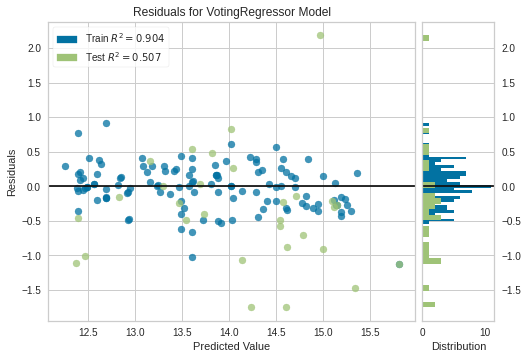

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [85]:
plot_model(blender)

#### 0.4.5.2. Prediction Error plot

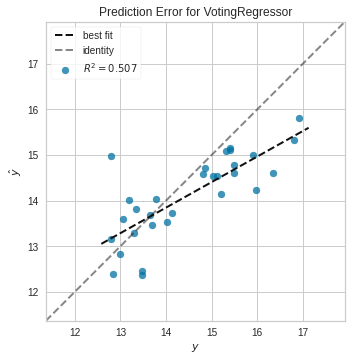

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [86]:
plot_model(blender, plot = 'error')

#### 0.4.5.3. Feature Importance plot

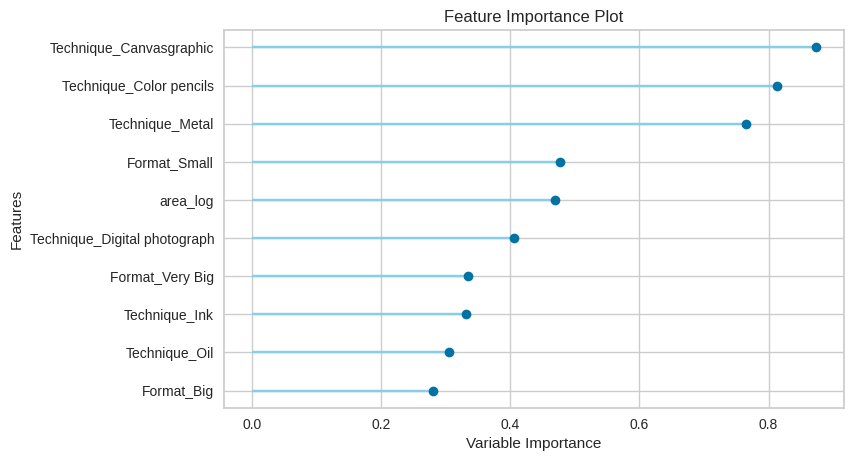

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [89]:
plot_model(lr, plot='feature')

#### 0.4.5.4. General plots

In [90]:
evaluate_model(blender)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=PowerTransformedTargetRegressor(estimators=[('br',
                                             BayesianRidge(alpha_1=0.1,
                                                           alpha_2=0.1,
                                                           alpha_init=None,
                                                           compute_score=True,
                                                           copy_X=True,
                                                           fit_intercept=True,
                                                           lambda_1=0.01,
                                                           lambda_2=1e-06,
                                                           lambda_init=None,
                                                           n_iter=300,
                                                           normalize=True,
                                                    

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

### 0.4.6. Predict the test data

In [91]:
predict_model(tuned_knn);

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=PowerTransformedTargetRegressor(algorithm='auto', leaf_size=30,
                                metric='minkowski', metric_params=None,
                                n_jobs=-1, n_neighbors=29, p=2,
                                power_transformer_method='box-cox',
                                power_transformer_standardize=True,
                                regressor=KNeighborsRegressor(algorithm='auto',
                                                              leaf_size=30,
                                                              metric='minkowski',
                                                              metric_params=None,
                                                              n_jobs=-1,
                                                              n_neighbors=29,
                                                              p=2,
                                                     

Model     MAE     MSE    RMSE      R2   RMSLE   MAPE
0  K Neighbors Regressor  0.6273  0.6816  0.8256  0.5579  0.0531  0.043

### 0.4.7. Finalize model for deployment

In [92]:
final_knn = finalize_model(tuned_knn)

INFO:logs:Initializing finalize_model()
INFO:logs:finalize_model(estimator=PowerTransformedTargetRegressor(algorithm='auto', leaf_size=30,
                                metric='minkowski', metric_params=None,
                                n_jobs=-1, n_neighbors=29, p=2,
                                power_transformer_method='box-cox',
                                power_transformer_standardize=True,
                                regressor=KNeighborsRegressor(algorithm='auto',
                                                              leaf_size=30,
                                                              metric='minkowski',
                                                              metric_params=None,
                                                              n_jobs=-1,
                                                              n_neighbors=29,
                                                              p=2,
                                                   

In [93]:
print(final_knn)

PowerTransformedTargetRegressor(algorithm='auto', leaf_size=30,
                                metric='minkowski', metric_params=None,
                                n_jobs=-1, n_neighbors=29, p=2,
                                power_transformer_method='box-cox',
                                power_transformer_standardize=True,
                                regressor=KNeighborsRegressor(algorithm='auto',
                                                              leaf_size=30,
                                                              metric='minkowski',
                                                              metric_params=None,
                                                              n_jobs=-1,
                                                              n_neighbors=29,
                                                              p=2,
                                                              weights='distance'),
                                weights='di

In [94]:
predict_model(final_knn);

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=PowerTransformedTargetRegressor(algorithm='auto', leaf_size=30,
                                metric='minkowski', metric_params=None,
                                n_jobs=-1, n_neighbors=29, p=2,
                                power_transformer_method='box-cox',
                                power_transformer_standardize=True,
                                regressor=KNeighborsRegressor(algorithm='auto',
                                                              leaf_size=30,
                                                              metric='minkowski',
                                                              metric_params=None,
                                                              n_jobs=-1,
                                                              n_neighbors=29,
                                                              p=2,
                                                     

Model     MAE     MSE    RMSE      R2   RMSLE    MAPE
0  K Neighbors Regressor  0.0232  0.0119  0.1089  0.9923  0.0076  0.0018

### 0.4.8. Predict on unseen data

In [95]:
unseen_predictions = predict_model(final_knn, data=data_unseen)
unseen_predictions.head()

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=PowerTransformedTargetRegressor(algorithm='auto', leaf_size=30,
                                metric='minkowski', metric_params=None,
                                n_jobs=-1, n_neighbors=29, p=2,
                                power_transformer_method='box-cox',
                                power_transformer_standardize=True,
                                regressor=KNeighborsRegressor(algorithm='auto',
                                                              leaf_size=30,
                                                              metric='minkowski',
                                                              metric_params=None,
                                                              n_jobs=-1,
                                                              n_neighbors=29,
                                                              p=2,
                                                     

Model     MAE     MSE    RMSE      R2  RMSLE    MAPE
0  K Neighbors Regressor  0.5942  0.5163  0.7185  0.7564  0.048  0.0433

Technique    Format  weight_log   area_log  price_log      Label
0        Acrylic       Big    6.214608   8.853665  13.597795  14.114796
1  Color pencils  Very Big    8.699515  10.021271  16.228884  15.158477
2        Acrylic  Very Big    6.214608   7.968320  14.276956  13.608524
3            Oil  Very Big    7.313220   9.593560  14.619446  15.320436
4          Mixed       Big    7.313220   8.476371  14.138179  14.498275

In [96]:
from pycaret.utils import check_metric
check_metric(unseen_predictions.price_log, unseen_predictions.Label, 'R2')

0.7564

### 0.4.9. Saving the model

In [97]:
# Saving the model
save_model(final_knn,'Final KNN Model 5Oct2022')

INFO:logs:Initializing save_model()
INFO:logs:save_model(model=PowerTransformedTargetRegressor(algorithm='auto', leaf_size=30,
                                metric='minkowski', metric_params=None,
                                n_jobs=-1, n_neighbors=29, p=2,
                                power_transformer_method='box-cox',
                                power_transformer_standardize=True,
                                regressor=KNeighborsRegressor(algorithm='auto',
                                                              leaf_size=30,
                                                              metric='minkowski',
                                                              metric_params=None,
                                                              n_jobs=-1,
                                                              n_neighbors=29,
                                                              p=2,
                                                              w

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[], target='price_log',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strate...
                  PowerTransformedTargetRegressor(algorithm='auto', leaf_size=30,
                                                  metric='minkowski',
                                                  metric_params=None, n_jobs=-1,
                                                  n_neighbors=29, p=2,
         

In [98]:
saved_final_knn = load_model('Final KNN Model 5Oct2022')

INFO:logs:Initializing load_model()
INFO:logs:load_model(model_name=Final KNN Model 5Oct2022, platform=None, authentication=None, verbose=True)


Transformation Pipeline and Model Successfully Loaded


## 0.5. Predicting my own Artwork

In [99]:
url_path_pred = 'https://github.com/joaquinrovi/Art-Analytics/blob/main/paintings.xlsx?raw=true'
new_pred = pd.read_excel(url_path_pred, sheet_name='new_pred_transformed')
new_pred.head(5)

Technique Format  weight_log  area_log
0  Graphite  Small    6.214608  6.569481

In [100]:
new_prediction = predict_model(saved_final_knn, data=new_pred)

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[], ml_usecase='regression',
                                      numerical_features=[], target='price_log',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strate...
                 PowerTransformedTargetRegressor(algorithm='auto', leaf_size=30,
                                                 metric='minkowski',
                                                 metric_params=None, n_jobs=-1,
                      

In [101]:
new_prediction.head()

Technique Format  weight_log  area_log      Label
0  Graphite  Small    6.214608  6.569481  12.561123

In [102]:
#Generating the real selling price, originally is in price_log
import math
new_prediction['Price (COP)'] = math.exp(new_prediction['Label'])
new_prediction.head()

Technique Format  weight_log  area_log      Label    Price (COP)
0  Graphite  Small    6.214608  6.569481  12.561123  285250.518746

## 0.6. Conclusion

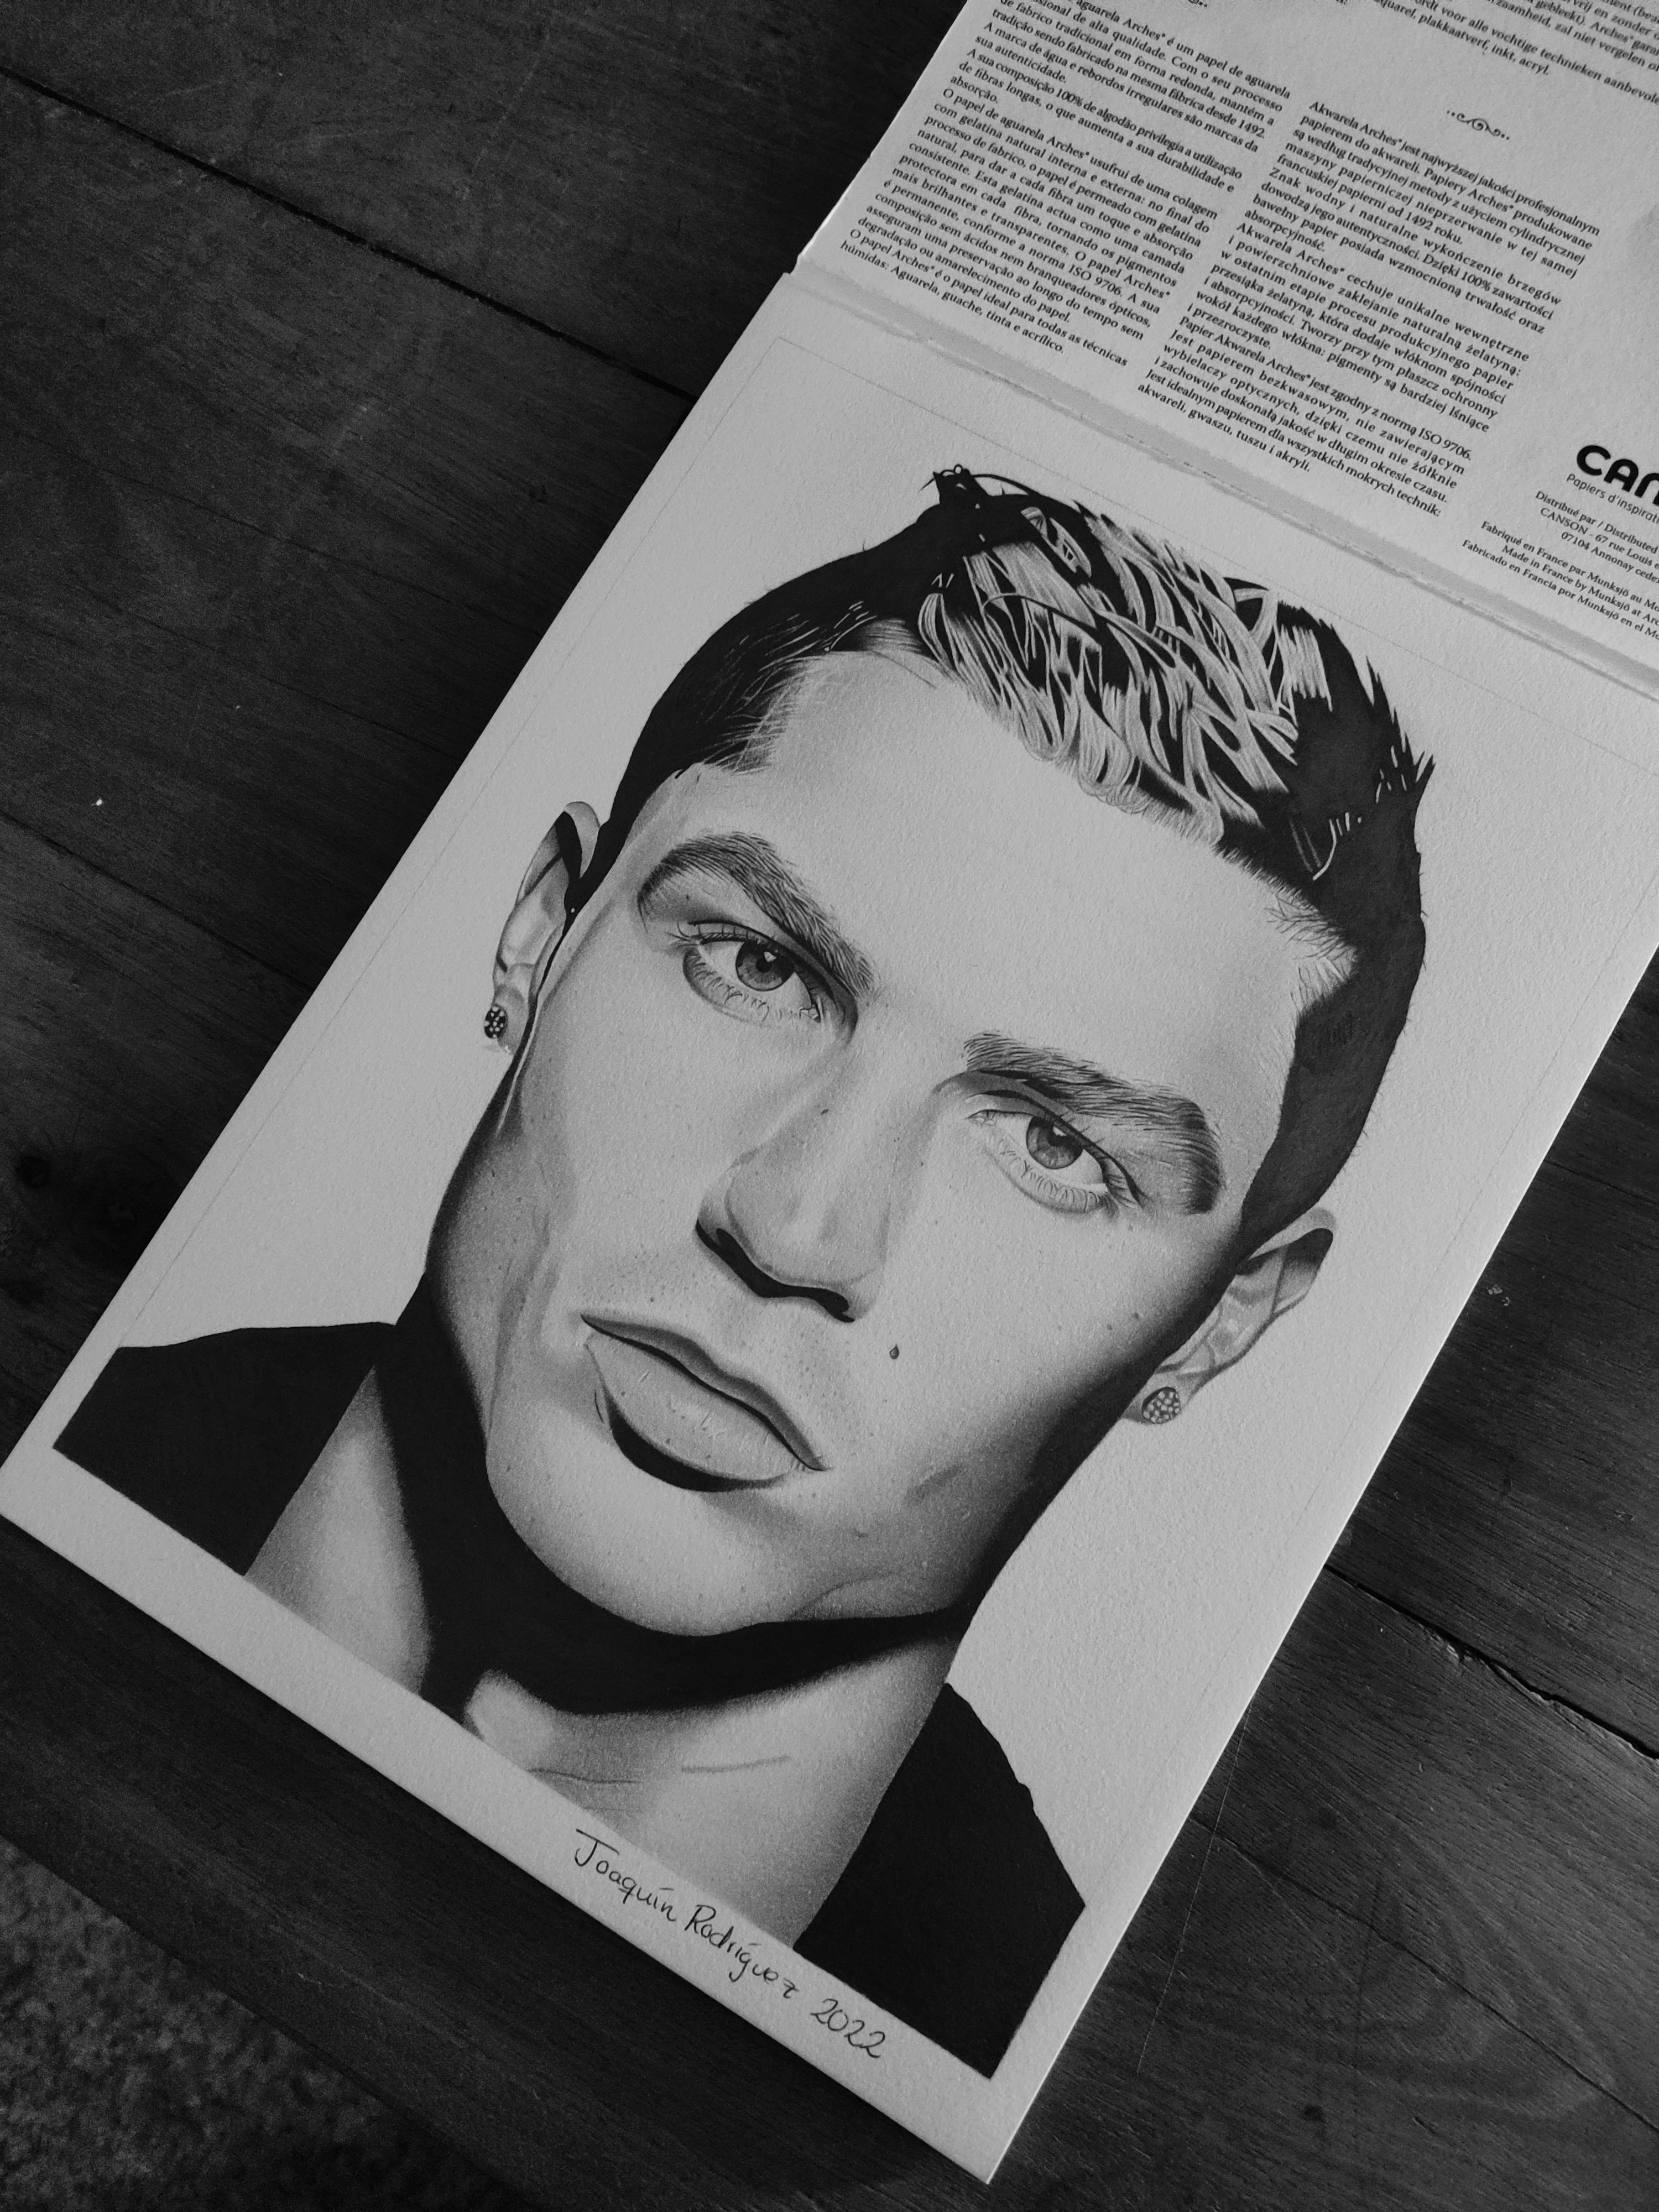

In this project we have seen which variables are the most accurate and significant in order to predict the final price of an artwork, in this sense, this model is a **tool** which can help artists worldwide on how to sell their artworks at a reasonable price. In that sense, it can be concluded that factors such as "area", "weight", "technique" and "format" are strong predictors for the selling price of an artwork and thus, factors such as "frame" or "style" are not as important as it can be initially be thought.

# My Ronaldo ArtWork has a selling price of 285,250.5 COP$.